# Telecom Churn Case Study:

### ***Problem Statement***: 

#### _Business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful._

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

#To handle class imbalance
from imblearn.over_sampling import SMOTE

#SKLearn
#importing KNN importer
#from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import sklearn

#Plot dicision tree
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

#PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

In [71]:
#Was fedup of incomplete rows & columns, finally found a way to do that
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [72]:
churn = pd.read_csv('telecom_churn_data.csv')
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [73]:
#data investigation
def data_inv(df):
    print('Number of rows:', df.shape[0])
    print('Dataset Variables:', df.shape[1])
    print('**'*25)
    print('Dataset Columns: ')
    print(df.columns)
    print('**'*25)
    print('Datatype of Each columns: \n')
    print(df.dtypes)
    print('**'*25)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
    print('**'*25)
    print('Missing vaules %age vise:\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation:')
    plt.figure(figsize=(8,6))
    sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')
    plt.show()   


Number of rows: 99999
Dataset Variables: 226
**************************************************
Dataset Columns: 
Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)
**************************************************
Datatype of Each columns: 

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8    

loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou

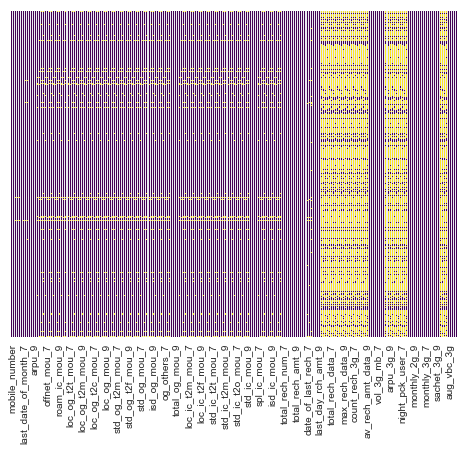

In [74]:
data_inv(churn)

Its a huge dataset having around 1,00,000 rows or datapoints & around 226 variables or Columns

On checking the data, it was found that the data is divided into complied data for 4th months.
- 6th
- 7th
- 8th 
- 9th

So in above, 6th & 7th month data is considered as a good data, and 8th month is conseidered as **Action** month, & finally 9th is called as churn month

Also on data investigation (above), found some abnormality with the data type, so need to dig deep in the column values.

##### Note: the Pictorial Representation might take a bit time


In [75]:
#making a data frame for the columns as they are so much & dataframe would be easy to read :)
col_df = pd.DataFrame(churn.columns, columns=['Column_Names'])
col_df

Column_Names
0               mobile_number
1                   circle_id
2              loc_og_t2o_mou
3              std_og_t2o_mou
4              loc_ic_t2o_mou
5        last_date_of_month_6
6        last_date_of_month_7
7        last_date_of_month_8
8        last_date_of_month_9
9                      arpu_6
10                     arpu_7
11                     arpu_8
12                     arpu_9
13                onnet_mou_6
14                onnet_mou_7
15                onnet_mou_8
16                onnet_mou_9
17               offnet_mou_6
18               offnet_mou_7
19               offnet_mou_8
20               offnet_mou_9
21              roam_ic_mou_6
22              roam_ic_mou_7
23              roam_ic_mou_8
24              roam_ic_mou_9
25              roam_og_mou_6
26              roam_og_mou_7
27              roam_og_mou_8
28              roam_og_mou_9
29           loc_og_t2t_mou_6
30           loc_og_t2t_mou_7
31           loc_og_t2t_mou_8
32           loc_og_t2t_mou_9
33           loc_og_t2m_mou_6
34           loc_og_t2m_mou_7
35           loc_og_t2m_mou_8
36           loc_og_t2m_mou_9
37           loc_og_t2f_mou_6
38           loc_og_t2f_mou_7
39           loc_og_t2f_mou_8
40           loc_og_t2f_mou_9
41           loc_og_t2c_mou_6
42           loc_og_t2c_mou_7
43           loc_og_t2c_mou_8
44           loc_og_t2c_mou_9
45               loc_og_mou_6
46               loc_og_mou_7
47               loc_og_mou_8
48               loc_og_mou_9
49           std_og_t2t_mou_6
50           std_og_t2t_mou_7
51           std_og_t2t_mou_8
52           std_og_t2t_mou_9
53           std_og_t2m_mou_6
54           std_og_t2m_mou_7
55           std_og_t2m_mou_8
56           std_og_t2m_mou_9
57           std_og_t2f_mou_6
58           std_og_t2f_mou_7
59           std_og_t2f_mou_8
60           std_og_t2f_mou_9
61           std_og_t2c_mou_6
62           std_og_t2c_mou_7
63           std_og_t2c_mou_8
64           std_og_t2c_mou_9
65               std_og_mou_6
66               std_og_mou_7
67               std_og_mou_8
68               std_og_mou_9
69               isd_og_mou_6
70               isd_og_mou_7
71               isd_og_mou_8
72               isd_og_mou_9
73               spl_og_mou_6
74               spl_og_mou_7
75               spl_og_mou_8
76               spl_og_mou_9
77                og_others_6
78                og_others_7
79                og_others_8
80                og_others_9
81             total_og_mou_6
82             total_og_mou_7
83             total_og_mou_8
84             total_og_mou_9
85           loc_ic_t2t_mou_6
86           loc_ic_t2t_mou_7
87           loc_ic_t2t_mou_8
88           loc_ic_t2t_mou_9
89           loc_ic_t2m_mou_6
90           loc_ic_t2m_mou_7
91           loc_ic_t2m_mou_8
92           loc_ic_t2m_mou_9
93           loc_ic_t2f_mou_6
94           loc_ic_t2f_mou_7
95           loc_ic_t2f_mou_8
96           loc_ic_t2f_mou_9
97               loc_ic_mou_6
98               loc_ic_mou_7
99               loc_ic_mou_8
100              loc_ic_mou_9
101          std_ic_t2t_mou_6
102          std_ic_t2t_mou_7
103          std_ic_t2t_mou_8
104          std_ic_t2t_mou_9
105          std_ic_t2m_mou_6
106          std_ic_t2m_mou_7
107          std_ic_t2m_mou_8
108          std_ic_t2m_mou_9
109          std_ic_t2f_mou_6
110          std_ic_t2f_mou_7
111          std_ic_t2f_mou_8
112          std_ic_t2f_mou_9
113          std_ic_t2o_mou_6
114          std_ic_t2o_mou_7
115          std_ic_t2o_mou_8
116          std_ic_t2o_mou_9
117              std_ic_mou_6
118              std_ic_mou_7
119              std_ic_mou_8
120              std_ic_mou_9
121            total_ic_mou_6
122            total_ic_mou_7
123            total_ic_mou_8
124            total_ic_mou_9
125              spl_ic_mou_6
126              spl_ic_mou_7
127              spl_ic_mou_8
128              spl_ic_mou_9
129              isd_ic_mou_6
130              isd_ic_mou_7
131              isd_ic_mou_8
132              isd_ic_mou

In [76]:
#The first 2 Columns are unique so lets categaries the same in id_columns
id_columns = ['mobile_number', 'circle_id']

In [77]:
#checking the missing data in this category
churn[id_columns].isnull().sum()

mobile_number    0
circle_id        0
dtype: int64

_None of missing values are present in the ID & these values are unique, so we can drop those_

_Second found some date columns, so data shows 12 data columns, lets bunch them together into date columns_

In [78]:
date_columns = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

_Checking missing values in the date columns_

In [79]:
#commenting it, as this is not needed right now
churn[date_columns].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [80]:
cat_columns =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

_Last but not the least the numerical columns, fetching the remaining columns to bunch in these categories_

In [81]:
num_columns = [column for column in churn.columns if column not in id_columns + date_columns + cat_columns]

In [82]:
#final Columns Tally
print('Number of Columns of ID type: ', len(id_columns))
print('Number of Columns of DATE type: ', len(date_columns))
print('Number of Columns of Categorical/Boolean type: ', len(cat_columns))
print('Number of Numerical Columns: ', len(num_columns))
print('-'* 35)
print('Total Number of Columns: ', (len(id_columns) + len(date_columns)+len(cat_columns)+len(num_columns) ))

Number of Columns of ID type:  2
Number of Columns of DATE type:  12
Number of Columns of Categorical/Boolean type:  8
Number of Numerical Columns:  204
-----------------------------------
Total Number of Columns:  226


_So 226 matches our final tally, lets now dig into the handling the missing values_
_dropping the ID & date columns, so that further analysis becomes easier_

In [83]:
print('Churn Shape before Dropping: ', churn.shape)
churn.drop(id_columns, axis=1, inplace=True)
print('Churn Shape After ID Columns Drop: ', churn.shape)
churn.drop(date_columns, axis=1, inplace=True)
print('Churn Shape After Date Columns Drop: ', churn.shape)

Churn Shape before Dropping:  (99999, 226)
Churn Shape After ID Columns Drop:  (99999, 224)
Churn Shape After Date Columns Drop:  (99999, 212)


_So, we have 212 variables to work with, lets continue handling for missing values_

In [84]:
c = churn.isnull().sum()*100/churn.shape[0]
c = c[c>0]
missing_values = pd.DataFrame(c, columns=['%age Missing Values'] )
missing_values

%age Missing Values
loc_og_t2o_mou                 1.018010
std_og_t2o_mou                 1.018010
loc_ic_t2o_mou                 1.018010
onnet_mou_6                    3.937039
onnet_mou_7                    3.859039
onnet_mou_8                    5.378054
onnet_mou_9                    7.745077
offnet_mou_6                   3.937039
offnet_mou_7                   3.859039
offnet_mou_8                   5.378054
offnet_mou_9                   7.745077
roam_ic_mou_6                  3.937039
roam_ic_mou_7                  3.859039
roam_ic_mou_8                  5.378054
roam_ic_mou_9                  7.745077
roam_og_mou_6                  3.937039
roam_og_mou_7                  3.859039
roam_og_mou_8                  5.378054
roam_og_mou_9                  7.745077
loc_og_t2t_mou_6               3.937039
loc_og_t2t_mou_7               3.859039
loc_og_t2t_mou_8               5.378054
loc_og_t2t_mou_9               7.745077
loc_og_t2m_mou_6               3.937039
loc_og_t2m_mou_7               3.859039
loc_og_t2m_mou_8               5.378054
loc_og_t2m_mou_9               7.745077
loc_og_t2f_mou_6               3.937039
loc_og_t2f_mou_7               3.859039
loc_og_t2f_mou_8               5.378054
loc_og_t2f_mou_9               7.745077
loc_og_t2c_mou_6               3.937039
loc_og_t2c_mou_7               3.859039
loc_og_t2c_mou_8               5.378054
loc_og_t2c_mou_9               7.745077
loc_og_mou_6                   3.937039
loc_og_mou_7                   3.859039
loc_og_mou_8                   5.378054
loc_og_mou_9                   7.745077
std_og_t2t_mou_6               3.937039
std_og_t2t_mou_7               3.859039
std_og_t2t_mou_8               5.378054
std_og_t2t_mou_9               7.745077
std_og_t2m_mou_6               3.937039
std_og_t2m_mou_7               3.859039
std_og_t2m_mou_8               5.378054
std_og_t2m_mou_9               7.745077
std_og_t2f_mou_6               3.937039
std_og_t2f_mou_7               3.859039
std_og_t2f_mou_8               5.378054
std_og_t2f_mou_9               7.745077
std_og_t2c_mou_6               3.937039
std_og_t2c_mou_7               3.859039
std_og_t2c_mou_8               5.378054
std_og_t2c_mou_9               7.745077
std_og_mou_6                   3.937039
std_og_mou_7                   3.859039
std_og_mou_8                   5.378054
std_og_mou_9                   7.745077
isd_og_mou_6                   3.937039
isd_og_mou_7                   3.859039
isd_og_mou_8                   5.378054
isd_og_mou_9                   7.745077
spl_og_mou_6                   3.937039
spl_og_mou_7                   3.859039
spl_og_mou_8                   5.378054
spl_og_mou_9                   7.745077
og_others_6                    3.937039
og_others_7                    3.859039
og_others_8                    5.378054
og_others_9                    7.745077
loc_ic_t2t_mou_6               3.937039
loc_ic_t2t_mou_7               3.859039
loc_ic_t2t_mou_8               5.378054
loc_ic_t2t_mou_9               7.745077
loc_ic_t2m_mou_6               3.937039
loc_ic_t2m_mou_7               3.859039
loc_ic_t2m_mou_8               5.378054
loc_ic_t2m_mou_9               7.745077
loc_ic_t2f_mou_6               3.937039
loc_ic_t2f_mou_7               3.859039
loc_ic_t2f_mou_8               5.378054
loc_ic_t2f_mou_9               7.745077
loc_ic_mou_6                   3.937039
loc_ic_mou_7                   3.859039
loc_ic_mou_8                   5.378054
loc_ic_mou_9                   7.745077
std_ic_t2t_mou_6               3.937039
std_ic_t2t_mou_7               3.859039
std_ic_t2t_mou_8               5.378054
std_ic_t2t_mou_9               7.745077
std_ic_t2m_mou_6               3.937039
std_ic_t2m_mou_7               3.859039
std_ic_t2m_mou_8               5.378054
std_ic_t2m_mou_9               7.745077
std_ic_t2f_mou_6               3.937039
std_ic_t2f_mou_7               3.859039
std_ic_t2f_mou_8               5.378054
std_ic_t2f_mou_9               7.745077
std_ic_t2o_mou_6    

In [85]:
#using some domain knowlegde here, zero recharge means that customer has not recharged, so this can be considered
#as a valid imputation
recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_columns].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

In [86]:
# impute missing values with 0
churn[recharge_columns] = churn[recharge_columns].apply(lambda x: x.fillna(0))

In [87]:
#null_check(churn)
churn[recharge_columns].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       99999.000000     99999.000000     99999.000000     99999.000000   
mean            0.632806         0.469025         0.522855         0.531075   
std             1.669040         1.521915         1.659925         1.654565   
min             0.000000         0.000000         0.000000         0.000000   
25%             0.000000         0.000000         0.000000         0.000000   
50%             0.000000         0.000000         0.000000         0.000000   
75%             1.000000         0.000000         0.000000         0.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     99999.000000     99999.000000     99999.000000     99999.000000   
mean          0.461885         0.150702         0.158982         0.167442   
std           1.371526         0.689999         0.755537         0.782059   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     99999.000000     99999.000000     99999.000000     99999.000000   
mean          0.170922        31.792048        32.406314        33.113011   
std           0.774557        77.248778        78.342435        78.872739   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         8.000000        14.000000        17.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count     99999.000000        99999.000000        99999.000000   
mean         32.387644           48.445409           51.393440   
std          78.818696          127.743863          132.629365   
min           0.000000            0.000000            0.000000   
25%           0.000000            0.000000            0.000000   
50%           0.000000            0.000000            0.000000   
75%          17.000000            8.250000           17.000000   
max        1555.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        99999.000000        99999.000000  
mean            52.027022           49.961089  
std            131.182609          127.804280  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%              0.000000            0.000000  
75%             23.000000           17.000000  
max           4076.000000         4061.000000

_Session gave an Idea to impute these values as -1, so these will be a new category & hence easy to drop_

In [88]:
c = churn[cat_columns].isnull().sum()*100/churn.shape[0]
print(c[c>0])

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64


In [89]:
churn[cat_columns] = churn[cat_columns].apply(lambda x: x.fillna(-1))

In [90]:
c = churn.isnull().sum()*100/churn.shape[0]
c = c[c>0]
print(c)

loc_og_t2o_mou       1.018010
std_og_t2o_mou       1.018010
loc_ic_t2o_mou       1.018010
onnet_mou_6          3.937039
onnet_mou_7          3.859039
onnet_mou_8          5.378054
onnet_mou_9          7.745077
offnet_mou_6         3.937039
offnet_mou_7         3.859039
offnet_mou_8         5.378054
offnet_mou_9         7.745077
roam_ic_mou_6        3.937039
roam_ic_mou_7        3.859039
roam_ic_mou_8        5.378054
roam_ic_mou_9        7.745077
roam_og_mou_6        3.937039
roam_og_mou_7        3.859039
roam_og_mou_8        5.378054
roam_og_mou_9        7.745077
loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6     3.937039
loc_og_t2f_mou_7     3.859039
loc_og_t2f_mou_8     5.378054
loc_og_t2f_mou_9     7.745077
loc_og_t2c_mou_6     3.937039
loc_og_t2c_mou_7     3.859039
loc_og_t2c

_Setting 70% as threshold, so the variables which have more than 70% missing values can we dropped_

In [91]:
c = churn.isnull().sum()*100/churn.shape[0]
c = c[c>70]
print(c)

arpu_3g_6    74.846748
arpu_3g_7    74.428744
arpu_3g_8    73.660737
arpu_3g_9    74.077741
arpu_2g_6    74.846748
arpu_2g_7    74.428744
arpu_2g_8    73.660737
arpu_2g_9    74.077741
dtype: float64


_Dropping the above 8 columns_

In [92]:
c.index

Index(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9'],
      dtype='object')

In [93]:
print('Shape before dropping: ', churn.shape)
churn.drop(c.index, axis =1, inplace=True)
print('Shape After dropping: ', churn.shape)

Shape before dropping:  (99999, 212)
Shape After dropping:  (99999, 204)


In [94]:
c = churn.isnull().sum()*100/churn.shape[0]
c = c[c>0]
missing_values = pd.DataFrame(c, columns=['%age Missing Values'] )
missing_values

%age Missing Values
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_mou_6             3.937039
loc_og_t2m_mou_7             3.859039
loc_og_t2m_mou_8             5.378054
loc_og_t2m_mou_9             7.745077
loc_og_t2f_mou_6             3.937039
loc_og_t2f_mou_7             3.859039
loc_og_t2f_mou_8             5.378054
loc_og_t2f_mou_9             7.745077
loc_og_t2c_mou_6             3.937039
loc_og_t2c_mou_7             3.859039
loc_og_t2c_mou_8             5.378054
loc_og_t2c_mou_9             7.745077
loc_og_mou_6                 3.937039
loc_og_mou_7                 3.859039
loc_og_mou_8                 5.378054
loc_og_mou_9                 7.745077
std_og_t2t_mou_6             3.937039
std_og_t2t_mou_7             3.859039
std_og_t2t_mou_8             5.378054
std_og_t2t_mou_9             7.745077
std_og_t2m_mou_6             3.937039
std_og_t2m_mou_7             3.859039
std_og_t2m_mou_8             5.378054
std_og_t2m_mou_9             7.745077
std_og_t2f_mou_6             3.937039
std_og_t2f_mou_7             3.859039
std_og_t2f_mou_8             5.378054
std_og_t2f_mou_9             7.745077
std_og_t2c_mou_6             3.937039
std_og_t2c_mou_7             3.859039
std_og_t2c_mou_8             5.378054
std_og_t2c_mou_9             7.745077
std_og_mou_6                 3.937039
std_og_mou_7                 3.859039
std_og_mou_8                 5.378054
std_og_mou_9                 7.745077
isd_og_mou_6                 3.937039
isd_og_mou_7                 3.859039
isd_og_mou_8                 5.378054
isd_og_mou_9                 7.745077
spl_og_mou_6                 3.937039
spl_og_mou_7                 3.859039
spl_og_mou_8                 5.378054
spl_og_mou_9                 7.745077
og_others_6                  3.937039
og_others_7                  3.859039
og_others_8                  5.378054
og_others_9                  7.745077
loc_ic_t2t_mou_6             3.937039
loc_ic_t2t_mou_7             3.859039
loc_ic_t2t_mou_8             5.378054
loc_ic_t2t_mou_9             7.745077
loc_ic_t2m_mou_6             3.937039
loc_ic_t2m_mou_7             3.859039
loc_ic_t2m_mou_8             5.378054
loc_ic_t2m_mou_9             7.745077
loc_ic_t2f_mou_6             3.937039
loc_ic_t2f_mou_7             3.859039
loc_ic_t2f_mou_8             5.378054
loc_ic_t2f_mou_9             7.745077
loc_ic_mou_6                 3.937039
loc_ic_mou_7                 3.859039
loc_ic_mou_8                 5.378054
loc_ic_mou_9                 7.745077
std_ic_t2t_mou_6             3.937039
std_ic_t2t_mou_7             3.859039
std_ic_t2t_mou_8             5.378054
std_ic_t2t_mou_9             7.745077
std_ic_t2m_mou_6             3.937039
std_ic_t2m_mou_7             3.859039
std_ic_t2m_mou_8             5.378054
std_ic_t2m_mou_9             7.745077
std_ic_t2f_mou_6             3.937039
std_ic_t2f_mou_7             3.859039
std_ic_t2f_mou_8             5.378054
std_ic_t2f_mou_9             7.745077
std_ic_t2o_mou_6             3.937039
std_ic_t2o_mou_7             3.859039
std_ic_t2o_mou_8             5.378054
std_ic_t2o_mou_9             7.745077
std_ic_mou_6                 3.937039
std_ic_mou_7                

In [95]:
#No of Columns having missing values
len(missing_values)

119

In [96]:
churn[missing_values.index].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   onnet_mou_6  \
count         98981.0         98981.0         98981.0  96062.000000   
mean              0.0             0.0             0.0    132.395875   
std               0.0             0.0             0.0    297.207406   
min               0.0             0.0             0.0      0.000000   
25%               0.0             0.0             0.0      7.380000   
50%               0.0             0.0             0.0     34.310000   
75%               0.0             0.0             0.0    118.740000   
max               0.0             0.0             0.0   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.240000       4729.740000       4557.140000   

       loc_og_t2m_mou_8

_On checking the describe printouts, it seems that the median is best option of imputation_

In [97]:
#function for median imputation
def median_impute(col_name):
    churn[col_name] = churn[col_name].fillna(churn[col_name].median())

In [98]:
for i in missing_values.index:
    median_impute(i)

In [99]:
c = churn.isnull().sum()/len(churn.index)
print(c[c>0])

Series([], dtype: float64)


_At this point the data is clean_

In [100]:
churn.to_csv('churn_clean.csv', index_label=False)

In [101]:
churn.shape

(99999, 204)

In [102]:
churn_data = pd.read_csv('churn_clean.csv')

In [103]:
churn_data.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100        34.31        32.33         0.00        29.84         96.31   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0        91.735          0.00         87.29            0.0           0.00   
1        99.840        304.76         53.76            0.0           0.00   
2       220.590        208.36        118.91            0.0           0.00   
3       109.010         71.68        113.54            0.0          54.86   
4        91.880        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00             11.91             11.61              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             11.26             41.03             40.43              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0             39.12              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0              0.00         65.11        63.685          0.00         61.84   
1              0.00         35.39       150.510        299.54         72.11   
2              0.48       

_We have columns for mou.
As per our problem statement, month 6 and 7 are good, month 8 is action month.
So, we can take the average of mou for 6 and 7 month, because when this will be compared to 8th month we can easily get variance._

In [104]:
#list of mou columns for 6th month
mou_6_Columns=[x for x in churn_data.columns if x.find('mou_6')!=-1]

In [105]:
#list of mou columns for 7th month
mou_7_Columns=[x for x in churn_data.columns if x.find('mou_7')!=-1]

In [106]:
#Calculate the average and store it in a new derived column by appending _7 at the end of column name
for x in mou_6_Columns:
    churn_data[x+'_7']=churn_data[x]+churn_data[x.replace('6','7')]/2
    

In [107]:
#Dropping original column and keeping only derived ones
churn_data.drop(mou_6_Columns, axis = 1, inplace = True)
churn_data.drop(mou_7_Columns, axis = 1, inplace = True)

_In the next step we would try to filter out the high value customers_

_The high value customer would be the customers whose recharge amount of the months lies in the 70% percentaile, in order to calculate this we'll follow the below steps_

- Calculate the total data recharge(_It would be the product of tatal recharge & average_)
- Calculate the total Voice recharge(fetch the data from direct column)
- Calculate the total recharge amount (Voice + Data)
- Calculate the 70% of the average data.
- Filter the customers.

Note: the data used to calculate would be for 6th & 7th Months as this data is **good** data.

In [108]:
#Calculating the total data recharge
churn_data['total_data_rech_6'] = churn_data.total_rech_data_6 * churn_data.av_rech_amt_data_6
churn_data['total_data_rech_7'] = churn_data.total_rech_data_7 * churn_data.av_rech_amt_data_7

In [109]:
#Calculate the total Voice recharge
churn_data['amt_data_6'] = churn_data.total_rech_amt_6 + churn_data.total_data_rech_6
churn_data['amt_data_7'] = churn_data.total_rech_amt_7 + churn_data.total_data_rech_7

In [110]:
#calculate the average recharge
churn_data['avg_amt_data_6_7'] = (churn_data.amt_data_6 + churn_data.amt_data_7)/2

In [111]:
#Calculate the 70% percentile
print("Recharge amount at 70th percentile: {}".format(churn_data['avg_amt_data_6_7'].quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [112]:
#filtering the cusomters which are more than 70 percentile

churn_filtered = churn_data.loc[churn_data.avg_amt_data_6_7 >= churn_data.avg_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 180)

### _Derive Churn_

_The Follwing steps would be used_

- Calculate total incoming and outgoing minutes of usage
- Calculate 2g and 3g data consumption
- Create churn variable: those who have not used either calls or internet in the month of September
are customers who have churned
- Check Churn percentage
- Delete columns that belong to the churn month

In [113]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [114]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [115]:
# create churn variable
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [116]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

In [117]:
churn_filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8   arpu_9  onnet_mou_8  onnet_mou_9  offnet_mou_8  offnet_mou_9  \
0   213.803   21.100         0.00        29.84          0.00         87.29   
1  3171.480  500.000        52.29        29.84        325.91         87.29   
2   137.362  166.787        35.08        33.46        136.48        108.71   
3   637.760  578.596        85.14       161.63        983.39        869.89   
4   366.966  811.480        33.58        15.74        205.89        111.88   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00            0.0   
1          31.64            0.0          38.06            0.0   
2           0.00            0.0           0.00            0.0   
3           0.00            0.0           0.00            0.0   
4           0.00            0.0           0.00            0.0   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00             11.26              0.00             39.12   
1             40.28             11.26            162.28             39.12   
2             12.49             26.13             50.54             34.58   
3             23.34             29.98            104.81            107.54   
4             33.58             15.74            148.56             83.73   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0              0.00              0.00              0.00              0.00   
1             53.23              0.00              0.00              0.00   
2              0.00              0.00              7.15              0.00   
3              1.58              0.00              0.00              0.00   
4              0.00              2.45             17.71              4.08   

   loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_8  std_og_t2t_mou_9  \
0          0.00         61.84              0.00              0.00   
1        255.79         61.84             12.01              0.00   
2         63.04         60.71             22.58              7.33   
3        129.74        137.53             61.79            131.64   
4        182.14        101.93              0.00              0.00   

   std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0              0.00              2.50              0.00              0.00   
1             49.14              2.50             16.68              0.00   
2             75.69             74.13              0.00              0.00   
3            876.99            762.34              0.00              0.00   
4             39.61             11.44              0.00              3.89   

   std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_8  std_og_mou_9  \
0               0.0               0.0          0.00          8.41   
1               0.0               0.0         77.84          8.41   
2               0.0               0.0         98.28         81.46   
3               0.0               0.0        938.79        893.99   
4               0.0               0.0         39.61         15.34   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_8  spl_og_mou_9  og_others_6  \
0          0.00           0.0          0.00          0.00          0.0   
1         10.01           0.0          6.50          0.00          0.0   
2          0.00           0.0         10.23          0.00          0.0   
3          0.00           0.0          0.00          0.00          0.0   
4          0.00           0.0         17.71         10.35          0.0   

   og_others_7  og_others_8  og_others_9

In [118]:
churn_filtered['churn'].value_counts(sort=True)

0    27560
1     2441
Name: churn, dtype: int64

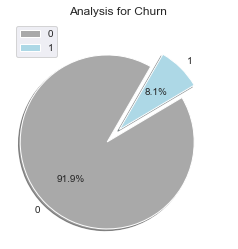

In [119]:
sizes = churn_filtered['churn'].value_counts(sort=True)
labels = ['0', '1']
explode = (.2,0)
colors_1 = ['darkgrey','lightblue']
plt.pie(sizes,explode=explode,colors=colors_1, labels=labels,autopct='%1.1f%%', shadow=True, startangle=60)
plt.title('Analysis for Churn ')
plt.legend(loc='best')
plt.show()

### We need to check if some column has only 1 unique value or just 1 and 0 as value which we have not considered as categorical column.

Drop columns if there is only one unique value as it will not help in any prediction

In [120]:
#Checking is there any column with only 1 unique values other than Target column and category columns
[x for x in churn_filtered.columns if churn_filtered[x].nunique()<=3]

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'std_og_t2c_mou_6_7',
 'std_ic_t2o_mou_6_7',
 'churn']

In [121]:
#looking for number of unique values
churn_filtered[['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'std_og_t2c_mou_6_7',
 'std_ic_t2o_mou_6_7']].nunique()

loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
std_og_t2c_mou_8      1
std_og_t2c_mou_9      1
std_ic_t2o_mou_8      1
std_ic_t2o_mou_9      1
night_pck_user_6      3
night_pck_user_7      3
night_pck_user_8      3
night_pck_user_9      3
fb_user_6             3
fb_user_7             3
fb_user_8             3
fb_user_9             3
std_og_t2c_mou_6_7    1
std_ic_t2o_mou_6_7    1
dtype: int64

In [122]:
print(churn_filtered.loc_og_t2o_mou.value_counts())

0.0    30001
Name: loc_og_t2o_mou, dtype: int64


In [123]:
print(churn_filtered.std_og_t2o_mou.value_counts())

0.0    30001
Name: std_og_t2o_mou, dtype: int64


In [124]:
#Dropping columns as it has same value for all rows, no variance in data.
churn_filtered.drop(['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'std_og_t2c_mou_6_7',
 'std_ic_t2o_mou_6_7'], axis = 1, inplace = True)

In [125]:
#looking for unique values= 3
churn_filtered['night_pck_user_6'].unique()

array([ 0., -1.,  1.])

In [126]:
# These columns are considered as category column. No need to drop. We will create dummies for these 
cat_columns

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [127]:
#change data type to category
churn_filtered[cat_columns] = churn_filtered[cat_columns].astype("category")

Creating few more derived columns from 6 & 7 month. As both of them are good months it will be easier to get variance with 8th month if we have one column instead of 2

In [128]:
#Calculating average and storing in derived column
churn_data['arpu_6_7_avg'] = (churn_data.arpu_6 + churn_data.arpu_7)/2

churn_data['total_rech_num_6_7_avg'] = (churn_data.total_rech_num_6 + churn_data.total_rech_num_7)/2
churn_data['total_rech_amt_6_7_avg'] = (churn_data.total_rech_amt_6 + churn_data.total_rech_amt_7)/2
churn_data['total_rech_data_6_7_avg'] = (churn_data.total_rech_data_6 + churn_data.total_rech_data_7)/2
churn_data['av_rech_amt_data_6_7_avg'] = (churn_data.av_rech_amt_data_6 + churn_data.av_rech_amt_data_7)/2
churn_data['vol_2g_mb_6_7_avg'] = (churn_data.vol_2g_mb_6 + churn_data.vol_2g_mb_7)/2
churn_data['vol_3g_mb_6_7_avg'] = (churn_data.vol_3g_mb_6 + churn_data.vol_3g_mb_7)/2

churn_filtered['max_rech_amt_6_7_avg'] = (churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2
churn_filtered['max_rech_data_6_7_avg'] = (churn_filtered.max_rech_data_6 + churn_filtered.max_rech_data_7)/2

original_columns=['arpu_6','arpu_7','total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7','total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','max_rech_amt_6','max_rech_amt_7','max_rech_data_6','max_rech_data_7']


In [129]:
#Dropping original column and keeping only derived ones
churn_data.drop(original_columns, axis = 1, inplace = True)

### Taking a backup of original dataset before dummy variable and scaling to use this dataset for RF algorithms like.

As we need to identify most important variables responsible for churn, we will be using RF as our model.
Benefits of RF: 
It handles categorical variables very well as it is.
Also, as it calculates Gini value of each column based on Target column it is not even biased to different scale of values in each column.
Hence, we will use dataset without scaling.

In [130]:
#Creating copy of dataset for RF
churn_filtered_RF=churn_filtered.copy()

In [131]:
#Remove KPI for the month of september from dataset used for RF
Sept_KPI_column_list=[x for x in churn_filtered.columns if x.find('_9')!=-1]

In [132]:
#Dropping columns for september month
churn_filtered_RF.drop(Sept_KPI_column_list, axis = 1, inplace = True)

In [133]:
cat_columns

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [134]:
#Create an preprocessing object to create dummies for dataset used for PCA and prediction model
label_encoder = preprocessing.LabelEncoder() 
#Create dummies for categoric columns
dummies = pd.get_dummies(churn_filtered[cat_columns])#, drop_first = True)

In [135]:
#Create list of columns to be dropped after dummies created.
#We will drop column for -1 value as those are missing values.
category_neg1 = [x+'_-1.0' for x in cat_columns]
category_neg1

['night_pck_user_6_-1.0',
 'night_pck_user_7_-1.0',
 'night_pck_user_8_-1.0',
 'night_pck_user_9_-1.0',
 'fb_user_6_-1.0',
 'fb_user_7_-1.0',
 'fb_user_8_-1.0',
 'fb_user_9_-1.0']

In [136]:
dummies.head()

night_pck_user_6_-1.0  night_pck_user_6_0.0  night_pck_user_6_1.0  \
0                      0                     1                     0   
1                      1                     0                     0   
2                      1                     0                     0   
3                      1                     0                     0   
4                      1                     0                     0   

   night_pck_user_7_-1.0  night_pck_user_7_0.0  night_pck_user_7_1.0  \
0                      0                     1                     0   
1                      1                     0                     0   
2                      0                     1                     0   
3                      1                     0                     0   
4                      0                     1                     0   

   night_pck_user_8_-1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0                      0                     1                     0   
1                      1                     0                     0   
2                      0                     1                     0   
3                      1                     0                     0   
4                      0                     1                     0   

   night_pck_user_9_-1.0  night_pck_user_9_0.0  night_pck_user_9_1.0  \
0                      1                     0                     0   
1                      1                     0                     0   
2                      1                     0                     0   
3                      1                     0                     0   
4                      0                     1                     0   

   fb_user_6_-1.0  fb_user_6_0.0  fb_user_6_1.0  fb_user_7_-1.0  \
0               0              0              1               0   
1               1              0              0               1   
2               1              0              0               0   
3               1              0              0               1   
4               1              0              0               0   

   fb_user_7_0.0  fb_user_7_1.0  fb_user_8_-1.0  fb_user_8_0.0  fb_user_8_1.0  \
0              0              1               0              0              1   
1              0              0               1              0              0   
2              0              1               0              0              1   
3              0              0               1              0              0   
4              0              1               0              0              1   

   fb_user_9_-1.0  fb_user_9_0.0  fb_user_9_1.0  
0               1              0              0  
1               1              0              0  
2               1              0              0  
3               1              0              0  
4               0              0              1

In [137]:
#Dropping one of the dummy column where name has -1 appended as suffix
dummies.drop(category_neg1, axis = 1, inplace = True)

In [138]:
#Concat original dataset with dummy columns
churn_filtered = pd.concat([churn_filtered, dummies], axis = 1)

In [139]:
#Dropping original columns
churn_filtered.drop(cat_columns, axis = 1, inplace = True)

In [140]:
#Remove KPI for the month of september for original dataset
Sept_KPI_column_list=[x for x in churn_filtered.columns if x.find('_9')!=-1]
#Dropping columns for september month
churn_filtered.drop(Sept_KPI_column_list, axis = 1, inplace = True)

In [141]:
churn_filtered.shape

(30001, 133)

In [142]:
churn_filtered.head()

arpu_6    arpu_7    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0   197.385   214.816   213.803         0.00          0.00           0.00   
1  1069.180  1349.850  3171.480        52.29        325.91          31.64   
2   378.721   492.223   137.362        35.08        136.48           0.00   
3   514.453   597.753   637.760        85.14        983.39           0.00   
4    74.350   193.897   366.966        33.58        205.89           0.00   

   roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
1          38.06             40.28            162.28             53.23   
2           0.00             12.49             50.54              0.00   
3           0.00             23.34            104.81              1.58   
4           0.00             33.58            148.56              0.00   

   loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
0              0.00          0.00              0.00              0.00   
1              0.00        255.79             12.01             49.14   
2              7.15         63.04             22.58             75.69   
3              0.00        129.74             61.79            876.99   
4             17.71        182.14              0.00             39.61   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_6  \
0              0.00          0.00          0.00          0.00          0.0   
1             16.68         77.84         10.01          6.50          0.0   
2              0.00         98.28          0.00         10.23          0.0   
3              0.00        938.79          0.00          0.00          0.0   
4              0.00         39.61          0.00         17.71          0.0   

   og_others_7  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0          0.0          0.0            0.00              0.16   
1          0.0          0.0          350.16             27.31   
2          0.0          0.0          171.56              0.31   
3          0.0          0.0         1068.54             19.54   
4          0.0          0.0          239.48             76.64   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0              4.13              1.15          5.44              0.00   
1            121.19             39.53        188.04             30.39   
2             15.48              0.00         15.79              0.10   
3            129.16             10.39        159.11              0.18   
4            146.84              0.71        224.21             13.38   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0              0.00              0.00          0.00            5.44   
1            141.33             22.21        193.94          428.74   
2              0.65              0.00          0.75           16.54   
3            101.74              0.00        101.93          261.04   
4             43.91              0.00         57.29          298.33   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  \
0           0.0          0.00         0.00         0.00         0.00   
1           0.0         31.59        15.74        15.19        15.14   
2           0.0          0.00         0.00         0.00         0.00   
3           0.0          0.00         0.00         0.00         0.00   
4           0.0          3.74         0.00         5.35        13.06   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                 4                 3                 2               362   
1                 5                 5                 7              1580   
2                19                21                14               437   
3                22                26                27               600   
4                 3                 5                 4                 0   

   total_rech_amt_7  total_rech_amt_

## Exploratory Data Analysis

In [143]:
churn_filtered.dtypes

arpu_6                    float64
arpu_7                    float64
arpu_8                    float64
onnet_mou_8               float64
offnet_mou_8              float64
roam_ic_mou_8             float64
roam_og_mou_8             float64
loc_og_t2t_mou_8          float64
loc_og_t2m_mou_8          float64
loc_og_t2f_mou_8          float64
loc_og_t2c_mou_8          float64
loc_og_mou_8              float64
std_og_t2t_mou_8          float64
std_og_t2m_mou_8          float64
std_og_t2f_mou_8          float64
std_og_mou_8              float64
isd_og_mou_8              float64
spl_og_mou_8              float64
og_others_6               float64
og_others_7               float64
og_others_8               float64
total_og_mou_8            float64
loc_ic_t2t_mou_8          float64
loc_ic_t2m_mou_8          float64
loc_ic_t2f_mou_8          float64
loc_ic_mou_8              float64
std_ic_t2t_mou_8          float64
std_ic_t2m_mou_8          float64
std_ic_t2f_mou_8          float64
std_ic_mou_8  

In [144]:
#Automating the plotting 

def data_type_check(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate_plotting(variable, stats=True):
    
    if data_type_check(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print('Summary Stats: \n')
            print(variable.describe())
            print('**'*10)
    
    elif data_type_check(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            print('**'*10)
            
    else:
        print("Error in Variable checking!")
        
def bivariate_plotting(var1, var2):
    colormap = np.array(['r', 'g', 'b'])
    if data_type_check(var1) == 'numerical' and data_type_check(var2) == 'numerical':
        sns.scatterplot(var1, var2, hue=churn_filtered.churn)
    elif (data_type_check(var1) == 'categorical' and data_type_check(var2) == 'numerical') or (data_type_check(var1) == 'numerical' and data_type_check(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

In [145]:
for i in churn_filtered.columns:
    col_name = 'churn_filtered.' + i
    print(col_name)

churn_filtered.arpu_6
churn_filtered.arpu_7
churn_filtered.arpu_8
churn_filtered.onnet_mou_8
churn_filtered.offnet_mou_8
churn_filtered.roam_ic_mou_8
churn_filtered.roam_og_mou_8
churn_filtered.loc_og_t2t_mou_8
churn_filtered.loc_og_t2m_mou_8
churn_filtered.loc_og_t2f_mou_8
churn_filtered.loc_og_t2c_mou_8
churn_filtered.loc_og_mou_8
churn_filtered.std_og_t2t_mou_8
churn_filtered.std_og_t2m_mou_8
churn_filtered.std_og_t2f_mou_8
churn_filtered.std_og_mou_8
churn_filtered.isd_og_mou_8
churn_filtered.spl_og_mou_8
churn_filtered.og_others_6
churn_filtered.og_others_7
churn_filtered.og_others_8
churn_filtered.total_og_mou_8
churn_filtered.loc_ic_t2t_mou_8
churn_filtered.loc_ic_t2m_mou_8
churn_filtered.loc_ic_t2f_mou_8
churn_filtered.loc_ic_mou_8
churn_filtered.std_ic_t2t_mou_8
churn_filtered.std_ic_t2m_mou_8
churn_filtered.std_ic_t2f_mou_8
churn_filtered.std_ic_mou_8
churn_filtered.total_ic_mou_8
churn_filtered.spl_ic_mou_8
churn_filtered.isd_ic_mou_8
churn_filtered.ic_others_6
churn_filtere

Summary Stats: 

count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
********************


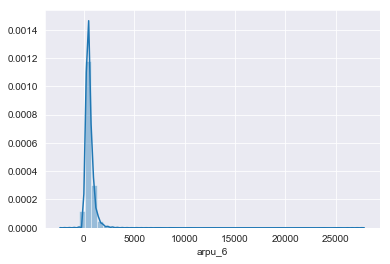

In [146]:
univariate_plotting(churn_filtered.arpu_6)

Summary Stats: 

count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
********************


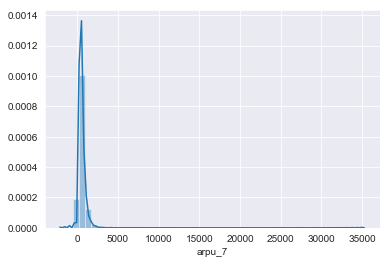

In [147]:
univariate_plotting(churn_filtered.arpu_7)

Summary Stats: 

count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64
********************


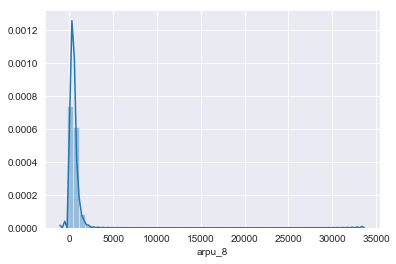

In [148]:
univariate_plotting(churn_filtered.arpu_8)

Summary Stats: 

count    30001.000000
mean       235.378852
std        457.844464
min          0.000000
25%         15.630000
50%         65.610000
75%        239.960000
max      10752.560000
Name: onnet_mou_8, dtype: float64
********************


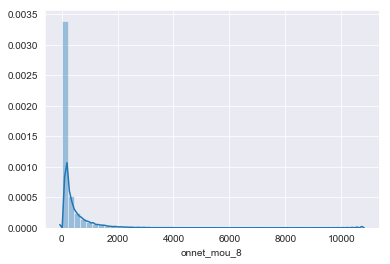

In [149]:
univariate_plotting(churn_filtered.onnet_mou_8)

Summary Stats: 

count    30001.000000
mean       338.682670
std        479.882371
min          0.000000
25%         63.190000
50%        182.790000
75%        438.890000
max      14007.340000
Name: offnet_mou_8, dtype: float64
********************


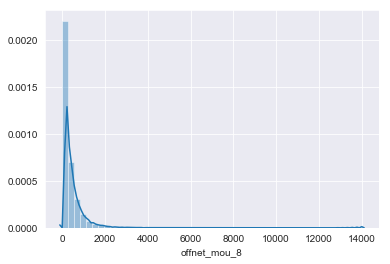

In [150]:
univariate_plotting(churn_filtered.offnet_mou_8)

Summary Stats: 

count    30001.000000
mean        78.536131
std        227.227313
min          0.000000
25%          4.360000
50%         20.730000
75%         72.040000
max      10752.560000
Name: loc_og_t2t_mou_8, dtype: float64
********************


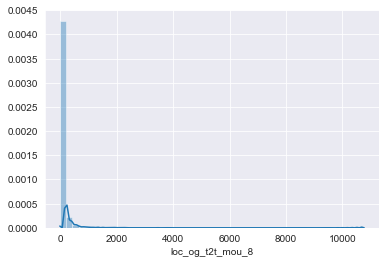

In [151]:
univariate_plotting(churn_filtered.loc_og_t2t_mou_8)

Summary Stats: 

count    30001.000000
mean       153.336181
std        232.764460
min          0.000000
25%         19.090000
50%         67.760000
75%        196.960000
max       4961.330000
Name: loc_og_t2m_mou_8, dtype: float64
********************


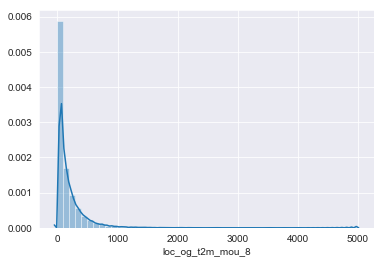

In [152]:
univariate_plotting(churn_filtered.loc_og_t2m_mou_8)

Summary Stats: 

count    30001.000000
mean       395.615293
std        658.726914
min          0.000000
25%         34.310000
50%        138.905000
75%        457.610000
max      10583.230000
Name: onnet_mou_6_7, dtype: float64
********************


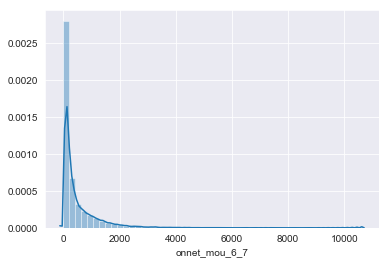

In [153]:
univariate_plotting(churn_filtered.onnet_mou_6_7)

Summary Stats: 

count    30001.000000
mean       565.316119
std        686.173579
min          0.000000
25%        132.985000
50%        354.750000
75%        746.535000
max      11796.025000
Name: offnet_mou_6_7, dtype: float64
********************


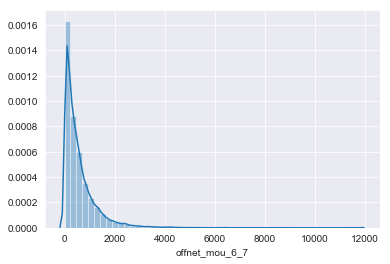

In [154]:
univariate_plotting(churn_filtered.offnet_mou_6_7)

Summary Stats: 

count    30001.000000
mean        22.431606
std        101.034014
min          0.000000
25%          0.000000
50%          0.000000
75%          2.175000
max       4214.555000
Name: roam_ic_mou_6_7, dtype: float64
********************


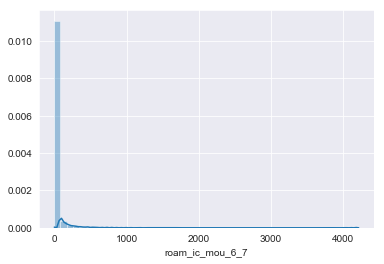

In [155]:
univariate_plotting(churn_filtered.roam_ic_mou_6_7)

Summary Stats: 

count    30001.000000
mean        36.647590
std        147.803543
min          0.000000
25%          0.000000
50%          0.000000
75%          4.795000
max       3991.730000
Name: roam_og_mou_6_7, dtype: float64
********************


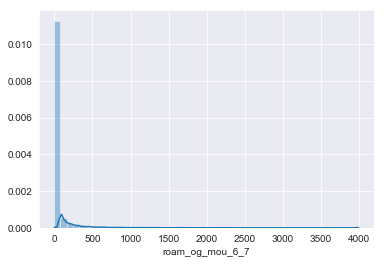

In [156]:
univariate_plotting(churn_filtered.roam_og_mou_6_7)

Summary Stats: 

count    30001.000000
mean       127.642161
std        332.348153
min          0.000000
25%         10.825000
50%         39.610000
75%        118.555000
max       8988.235000
Name: loc_og_t2t_mou_6_7, dtype: float64
********************


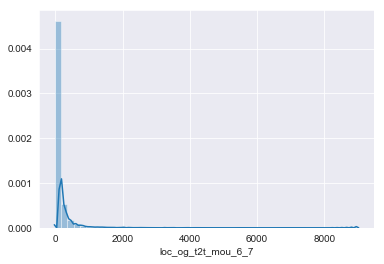

In [157]:
univariate_plotting(churn_filtered.loc_og_t2t_mou_6_7)

Summary Stats: 

count    30001.000000
mean       245.855468
std        352.273933
min          0.000000
25%         39.880000
50%        123.100000
75%        316.260000
max       6021.760000
Name: loc_og_t2m_mou_6_7, dtype: float64
********************


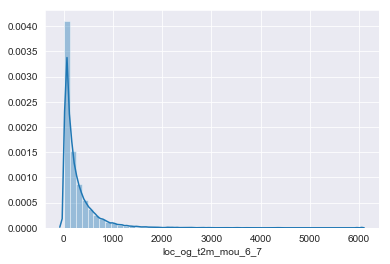

In [158]:
univariate_plotting(churn_filtered.loc_og_t2m_mou_6_7)

Summary Stats: 

count    30001.000000
mean         9.555956
std         31.664248
min          0.000000
25%          0.000000
50%          0.890000
75%          7.030000
max       2064.245000
Name: loc_og_t2f_mou_6_7, dtype: float64
********************


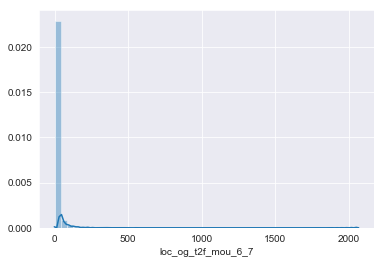

In [159]:
univariate_plotting(churn_filtered.loc_og_t2f_mou_6_7)

Summary Stats: 

count    30001.000000
mean         2.520042
std          9.106952
min          0.000000
25%          0.000000
50%          0.000000
75%          1.610000
max        556.295000
Name: loc_og_t2c_mou_6_7, dtype: float64
********************


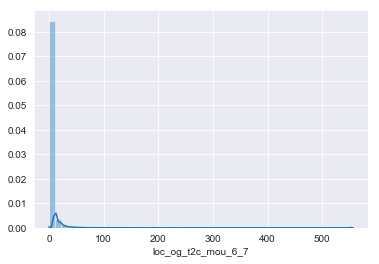

In [160]:
univariate_plotting(churn_filtered.loc_og_t2c_mou_6_7)

Summary Stats: 

count    30001.000000
mean       383.391288
std        540.269770
min          0.000000
25%         65.110000
50%        197.470000
75%        501.480000
max      11904.110000
Name: loc_og_mou_6_7, dtype: float64
********************


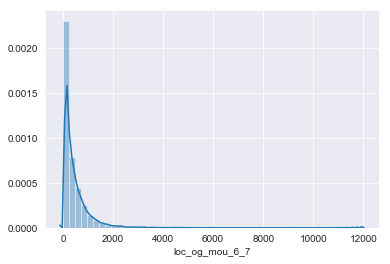

In [161]:
univariate_plotting(churn_filtered.loc_og_mou_6_7)

Summary Stats: 

count    30001.000000
mean       253.002282
std        578.426043
min          0.000000
25%          0.000000
50%          8.045000
75%        195.250000
max      10549.270000
Name: std_og_t2t_mou_6_7, dtype: float64
********************


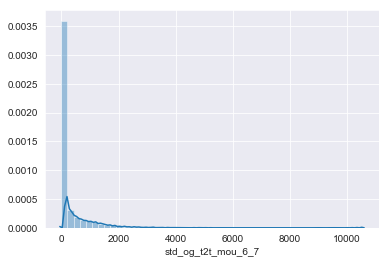

In [162]:
univariate_plotting(churn_filtered.std_og_t2t_mou_6_7)

Summary Stats: 

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64
********************


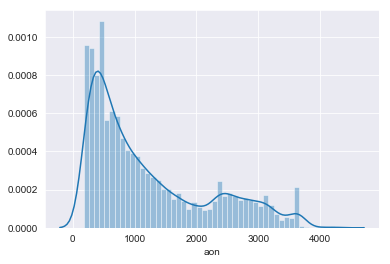

In [163]:
univariate_plotting(churn_filtered.aon)

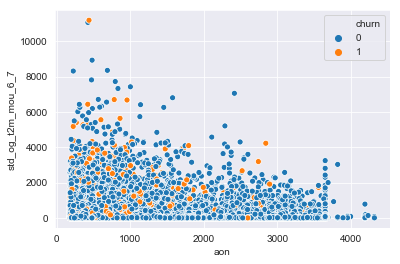

In [164]:
bivariate_plotting(churn_filtered.aon,churn_filtered.std_og_t2m_mou_6_7 )

Summary Stats: 

count    30001.000000
mean       273.498061
std        588.973624
min          0.000000
25%          1.230000
50%         32.665000
75%        256.960000
max      11194.915000
Name: std_og_t2m_mou_6_7, dtype: float64
********************


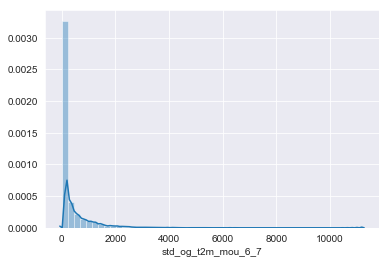

In [165]:
univariate_plotting(churn_filtered.std_og_t2m_mou_6_7)

Summary Stats: 

count    30001.000000
mean         2.716573
std         17.189748
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        628.560000
Name: std_og_t2f_mou_6_7, dtype: float64
********************


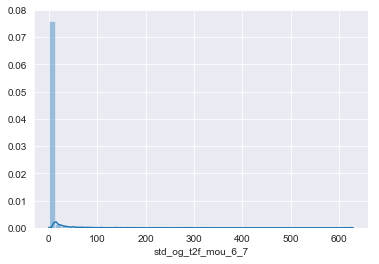

In [166]:
univariate_plotting(churn_filtered.std_og_t2f_mou_6_7)

Summary Stats: 

count    30001.000000
mean       529.428915
std        873.227593
min          0.000000
25%          3.930000
50%         88.060000
75%        776.940000
max      12244.105000
Name: std_og_mou_6_7, dtype: float64
********************


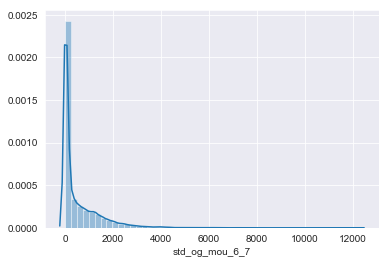

In [167]:
univariate_plotting(churn_filtered.std_og_mou_6_7)

Summary Stats: 

count    30001.000000
mean         3.224397
std         67.322881
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       8645.800000
Name: isd_og_mou_6_7, dtype: float64
********************


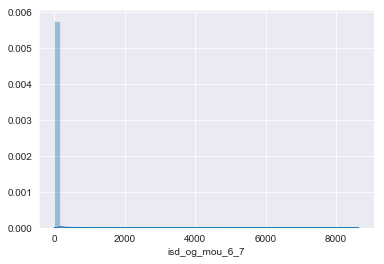

In [168]:
univariate_plotting(churn_filtered.isd_og_mou_6_7)

Summary Stats: 

count    30001.000000
mean         9.372593
std         25.202642
min          0.000000
25%          0.000000
50%          2.330000
75%          9.890000
max       1656.105000
Name: spl_og_mou_6_7, dtype: float64
********************


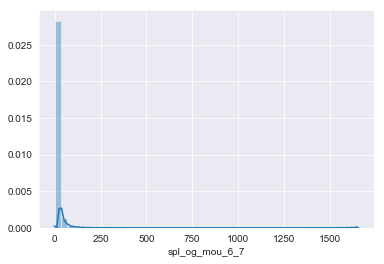

In [169]:
univariate_plotting(churn_filtered.spl_og_mou_6_7)

Summary Stats: 

count    30001.000000
mean       924.049275
std        979.398856
min          0.000000
25%        212.360000
50%        673.705000
75%       1315.900000
max      13011.765000
Name: total_og_mou_6_7, dtype: float64
********************


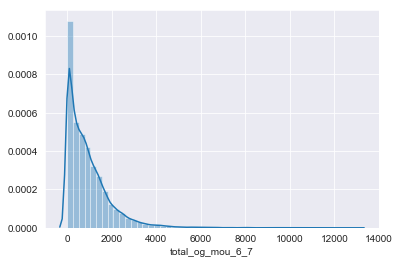

In [170]:
univariate_plotting(churn_filtered.total_og_mou_6_7)

Summary Stats: 

count    30001.000000
mean        99.197644
std        236.060952
min          0.000000
25%         13.830000
50%         40.620000
75%        102.565000
max       8891.880000
Name: loc_ic_t2t_mou_6_7, dtype: float64
********************


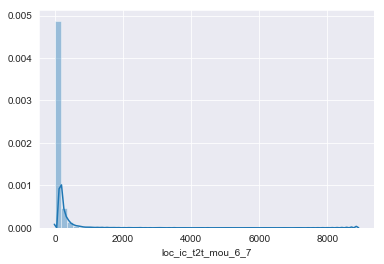

In [171]:
univariate_plotting(churn_filtered.loc_ic_t2t_mou_6_7)

Summary Stats: 

count    30001.000000
mean       227.762048
std        311.884901
min          0.000000
25%         54.205000
50%        130.460000
75%        283.525000
max       6779.615000
Name: loc_ic_t2m_mou_6_7, dtype: float64
********************


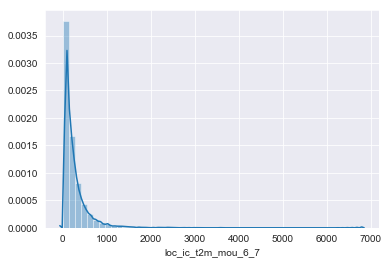

In [172]:
univariate_plotting(churn_filtered.loc_ic_t2m_mou_6_7)

Summary Stats: 

count    30001.000000
mean        23.320559
std         66.142791
min          0.000000
25%          0.355000
50%          3.800000
75%         19.130000
max       2020.315000
Name: loc_ic_t2f_mou_6_7, dtype: float64
********************


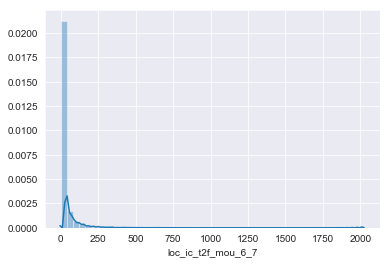

In [173]:
univariate_plotting(churn_filtered.loc_ic_t2f_mou_6_7)

Summary Stats: 

count    30001.000000
mean       350.809961
std        452.114738
min          0.000000
25%         89.220000
50%        208.400000
75%        446.070000
max      10283.985000
Name: loc_ic_mou_6_7, dtype: float64
********************


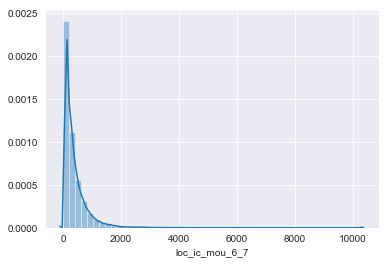

In [174]:
univariate_plotting(churn_filtered.loc_ic_mou_6_7)

Summary Stats: 

count    30001.000000
mean        22.605531
std        112.073942
min          0.000000
25%          0.000000
50%          1.950000
75%         14.425000
max       8360.025000
Name: std_ic_t2t_mou_6_7, dtype: float64
********************


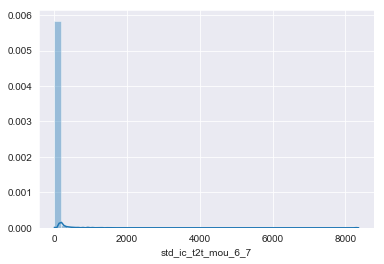

In [175]:
univariate_plotting(churn_filtered.std_ic_t2t_mou_6_7)

Summary Stats: 

count    30001.000000
mean        44.661608
std        140.297886
min          0.000000
25%          1.280000
50%         10.275000
75%         38.360000
max       5437.700000
Name: std_ic_t2m_mou_6_7, dtype: float64
********************


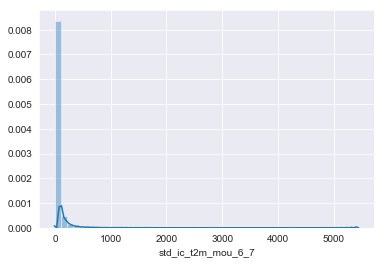

In [176]:
univariate_plotting(churn_filtered.std_ic_t2m_mou_6_7)

Summary Stats: 

count    30001.000000
mean         4.095077
std         26.992639
min          0.000000
25%          0.000000
50%          0.000000
75%          0.955000
max       1860.600000
Name: std_ic_t2f_mou_6_7, dtype: float64
********************


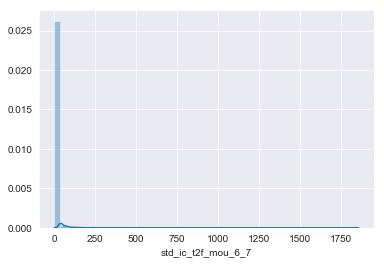

In [177]:
univariate_plotting(churn_filtered.std_ic_t2f_mou_6_7)

Summary Stats: 

count    30001.000000
mean        71.472829
std        198.760916
min          0.000000
25%          4.285000
50%         21.030000
75%         65.400000
max       8360.225000
Name: std_ic_mou_6_7, dtype: float64
********************


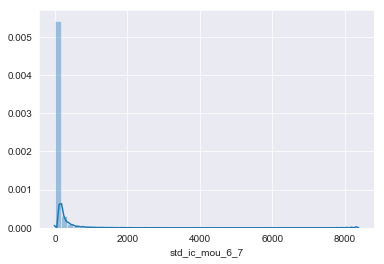

In [178]:
univariate_plotting(churn_filtered.std_ic_mou_6_7)

Summary Stats: 

count    30001.000000
mean       438.328989
std        527.480284
min          0.000000
25%        123.000000
50%        284.085000
75%        561.605000
max      11437.570000
Name: total_ic_mou_6_7, dtype: float64
********************


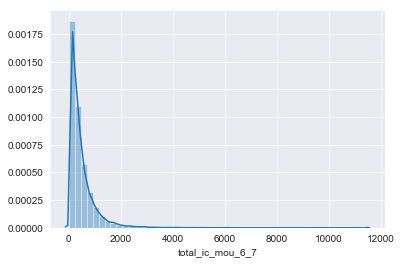

In [179]:
univariate_plotting(churn_filtered.total_ic_mou_6_7)

Summary Stats: 

count    30001.000000
mean         0.070918
std          0.234093
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.490000
Name: spl_ic_mou_6_7, dtype: float64
********************


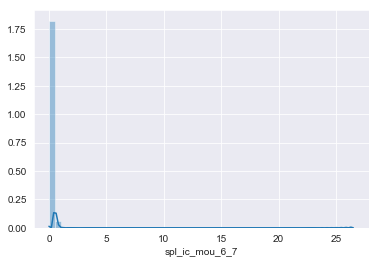

In [180]:
univariate_plotting(churn_filtered.spl_ic_mou_6_7)

Summary Stats: 

count    30001.000000
mean        16.722587
std        109.830267
min          0.000000
25%          0.000000
50%          0.000000
75%          0.705000
max       9045.730000
Name: isd_ic_mou_6_7, dtype: float64
********************


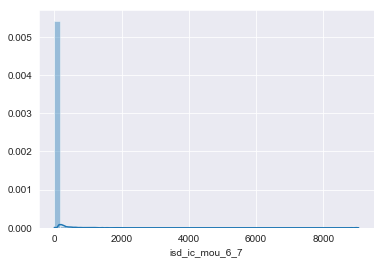

In [181]:
univariate_plotting(churn_filtered.isd_ic_mou_6_7)

Summary Stats: 

count    30001.000000
mean      1152.620628
std       1358.713982
min        478.000000
25%        603.000000
50%        800.000000
75%       1208.000000
max      61236.000000
Name: avg_amt_data_6_7, dtype: float64
********************


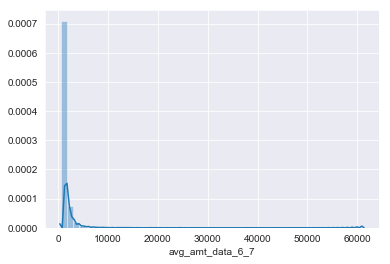

In [182]:
univariate_plotting(churn_filtered.avg_amt_data_6_7)

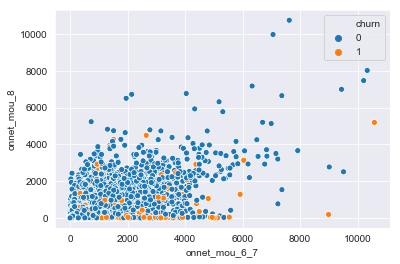

In [183]:
bivariate_plotting(churn_filtered.onnet_mou_6_7,churn_filtered.onnet_mou_8)

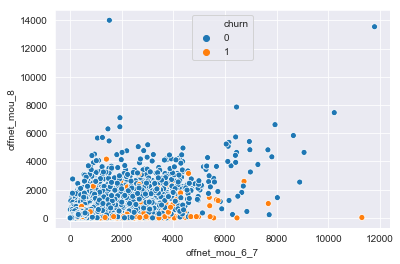

In [184]:
bivariate_plotting(churn_filtered.offnet_mou_6_7,churn_filtered.offnet_mou_8)

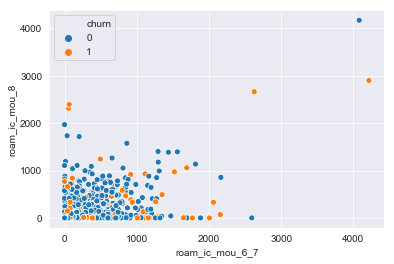

In [185]:
bivariate_plotting(churn_filtered.roam_ic_mou_6_7,churn_filtered.roam_ic_mou_8)

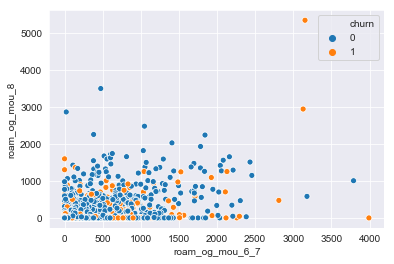

In [186]:
bivariate_plotting(churn_filtered.roam_og_mou_6_7,churn_filtered.roam_og_mou_8)

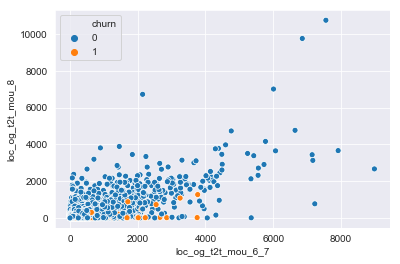

In [187]:
bivariate_plotting(churn_filtered.loc_og_t2t_mou_6_7,churn_filtered.loc_og_t2t_mou_8)

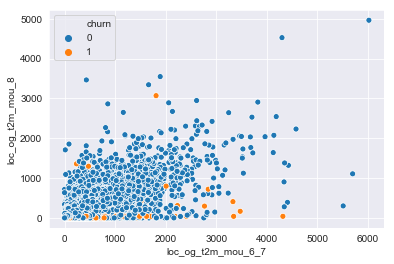

In [188]:
bivariate_plotting(churn_filtered.loc_og_t2m_mou_6_7,churn_filtered.loc_og_t2m_mou_8)

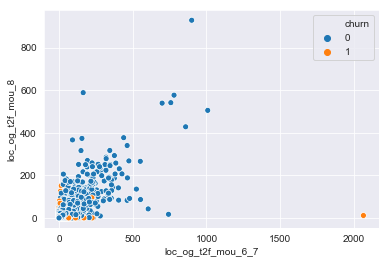

In [189]:
bivariate_plotting(churn_filtered.loc_og_t2f_mou_6_7,churn_filtered.loc_og_t2f_mou_8)

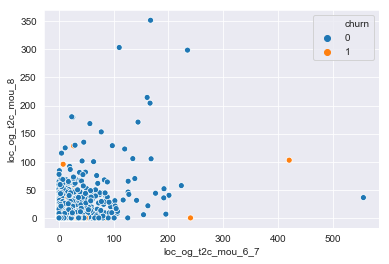

In [190]:
bivariate_plotting(churn_filtered.loc_og_t2c_mou_6_7,churn_filtered.loc_og_t2c_mou_8)

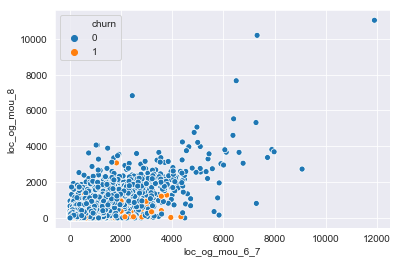

In [191]:
bivariate_plotting(churn_filtered.loc_og_mou_6_7,churn_filtered.loc_og_mou_8)

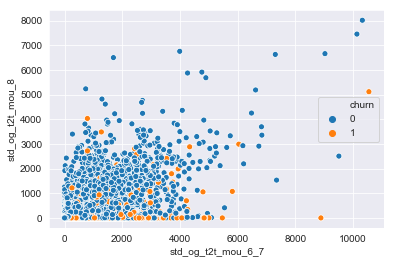

In [192]:
bivariate_plotting(churn_filtered.std_og_t2t_mou_6_7,churn_filtered.std_og_t2t_mou_8)

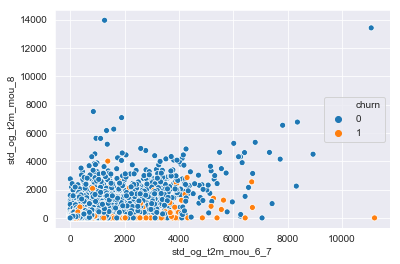

In [193]:
bivariate_plotting(churn_filtered.std_og_t2m_mou_6_7,churn_filtered.std_og_t2m_mou_8)

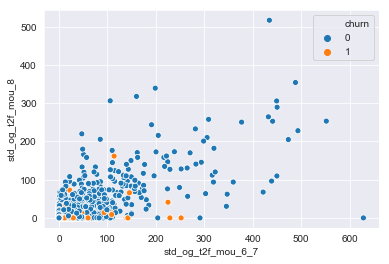

In [194]:
bivariate_plotting(churn_filtered.std_og_t2f_mou_6_7,churn_filtered.std_og_t2f_mou_8)

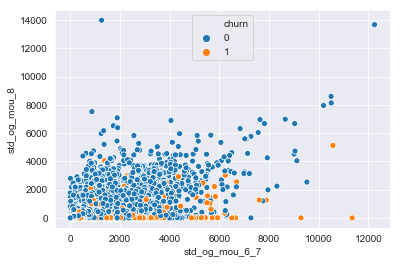

In [195]:
bivariate_plotting(churn_filtered.std_og_mou_6_7,churn_filtered.std_og_mou_8)

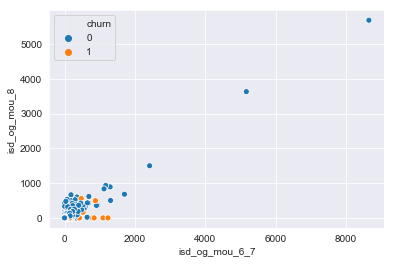

In [196]:
bivariate_plotting(churn_filtered.isd_og_mou_6_7,churn_filtered.isd_og_mou_8)

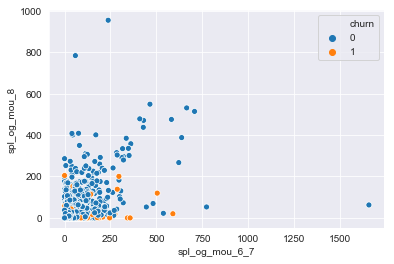

In [197]:
bivariate_plotting(churn_filtered.spl_og_mou_6_7,churn_filtered.spl_og_mou_8)

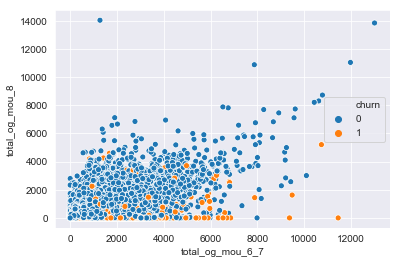

In [198]:
bivariate_plotting(churn_filtered.total_og_mou_6_7,churn_filtered.total_og_mou_8)

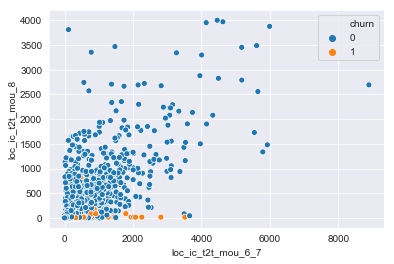

In [199]:
bivariate_plotting(churn_filtered.loc_ic_t2t_mou_6_7,churn_filtered.loc_ic_t2t_mou_8)

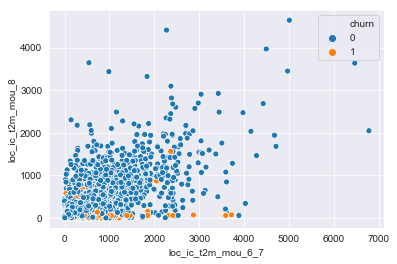

In [200]:
bivariate_plotting(churn_filtered.loc_ic_t2m_mou_6_7,churn_filtered.loc_ic_t2m_mou_8)

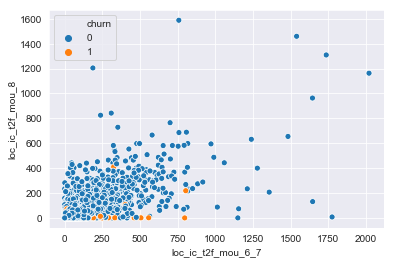

In [201]:
bivariate_plotting(churn_filtered.loc_ic_t2f_mou_6_7,churn_filtered.loc_ic_t2f_mou_8)

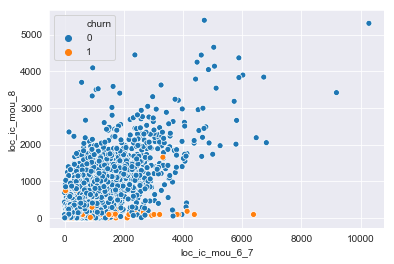

In [202]:
bivariate_plotting(churn_filtered.loc_ic_mou_6_7,churn_filtered.loc_ic_mou_8)

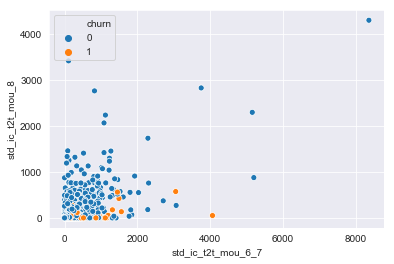

In [203]:
bivariate_plotting(churn_filtered.std_ic_t2t_mou_6_7,churn_filtered.std_ic_t2t_mou_8)

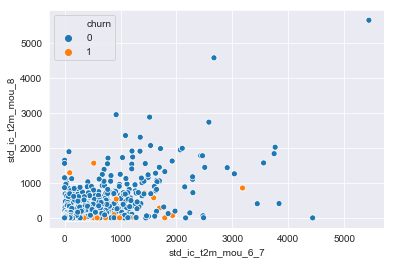

In [204]:
bivariate_plotting(churn_filtered.std_ic_t2m_mou_6_7,churn_filtered.std_ic_t2m_mou_8)

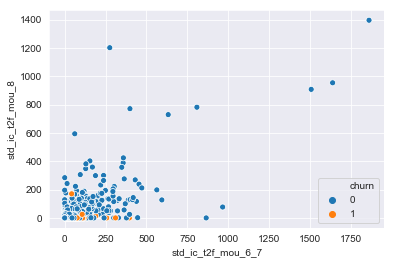

In [205]:
bivariate_plotting(churn_filtered.std_ic_t2f_mou_6_7,churn_filtered.std_ic_t2f_mou_8)

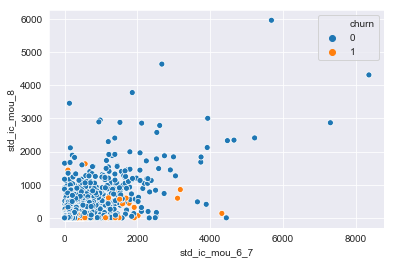

In [206]:
bivariate_plotting(churn_filtered.std_ic_mou_6_7,churn_filtered.std_ic_mou_8)

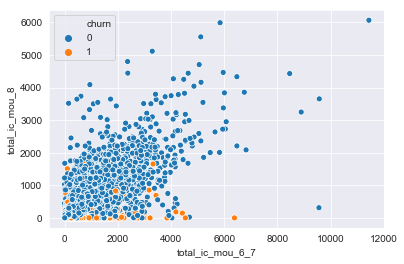

In [207]:
bivariate_plotting(churn_filtered.total_ic_mou_6_7,churn_filtered.total_ic_mou_8)

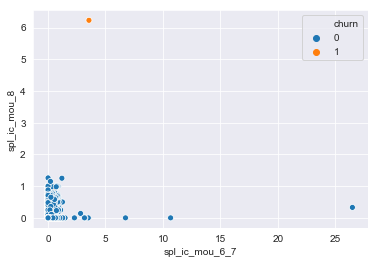

In [208]:
bivariate_plotting(churn_filtered.spl_ic_mou_6_7,churn_filtered.spl_ic_mou_8)

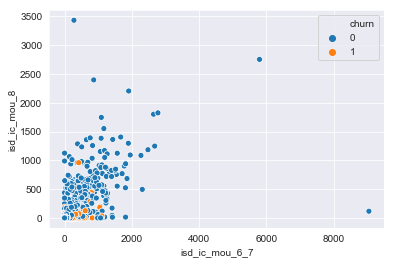

In [209]:
bivariate_plotting(churn_filtered.isd_ic_mou_6_7,churn_filtered.isd_ic_mou_8)

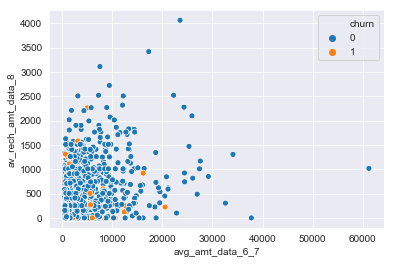

In [210]:
bivariate_plotting(churn_filtered.avg_amt_data_6_7,churn_filtered.av_rech_amt_data_8)

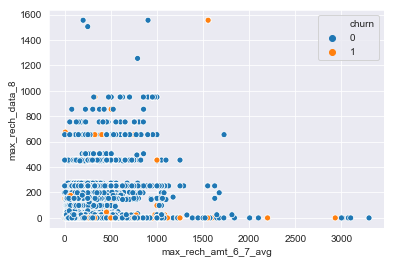

In [211]:
bivariate_plotting(churn_filtered.max_rech_amt_6_7_avg,churn_filtered.max_rech_data_8)

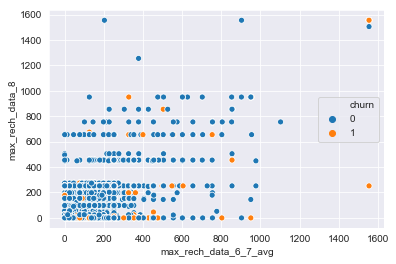

In [212]:
bivariate_plotting(churn_filtered.max_rech_data_6_7_avg,churn_filtered.max_rech_data_8)

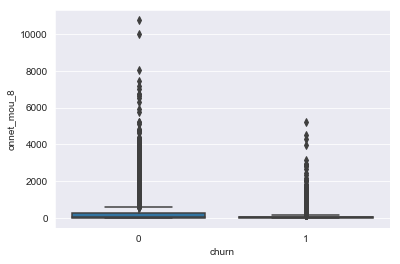

In [213]:
bivariate_plotting(churn_filtered.churn,churn_filtered.onnet_mou_8)

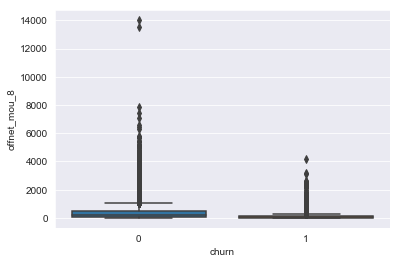

In [214]:
bivariate_plotting(churn_filtered.churn,churn_filtered.offnet_mou_8)

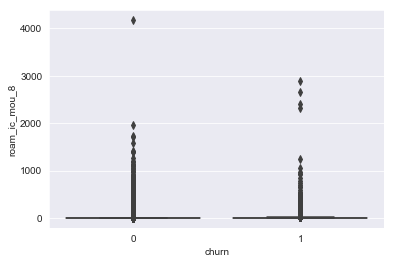

In [215]:
bivariate_plotting(churn_filtered.churn,churn_filtered.roam_ic_mou_8)

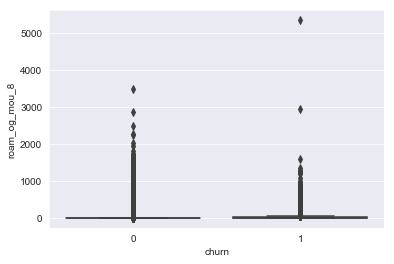

In [216]:
bivariate_plotting(churn_filtered.churn,churn_filtered.roam_og_mou_8)

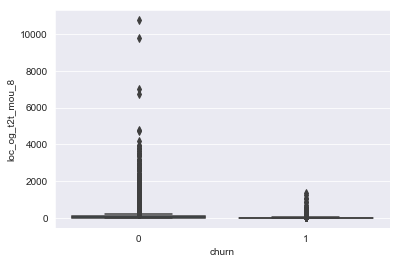

In [217]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_t2t_mou_8)

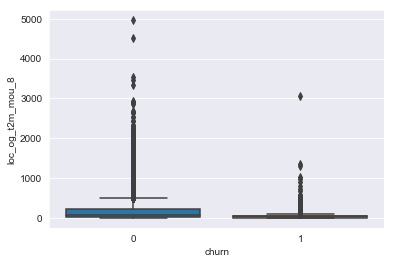

In [218]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_t2m_mou_8)

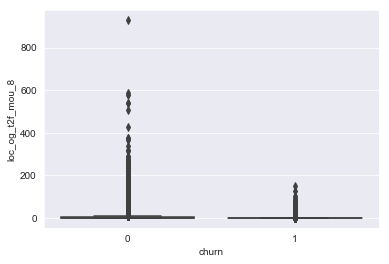

In [219]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_t2f_mou_8)

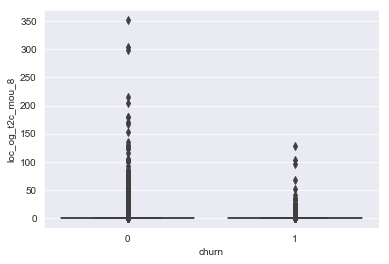

In [220]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_t2c_mou_8)

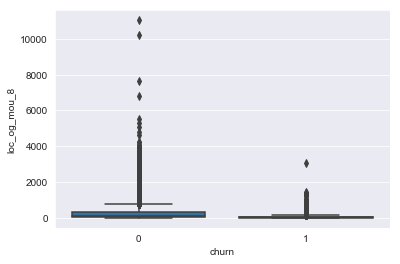

In [221]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_mou_8)

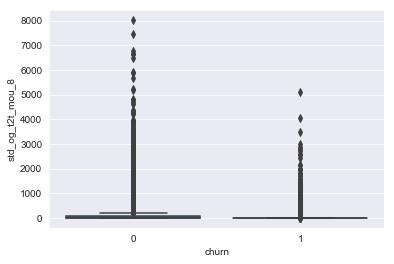

In [222]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_og_t2t_mou_8)

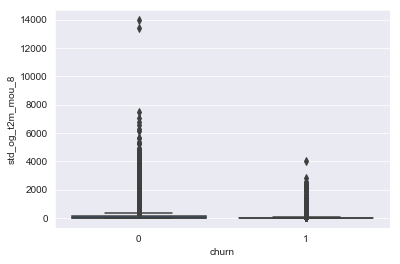

In [223]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_og_t2m_mou_8)

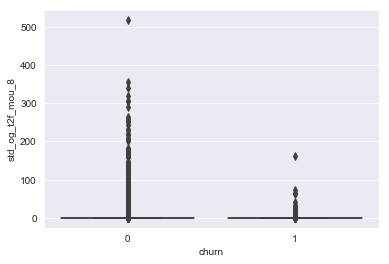

In [224]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_og_t2f_mou_8)

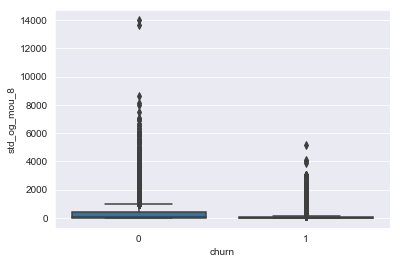

In [225]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_og_mou_8)

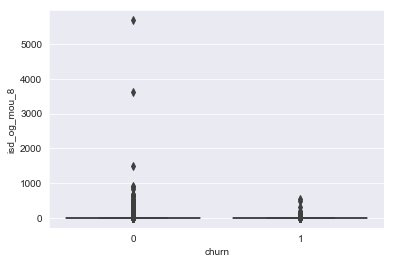

In [226]:
bivariate_plotting(churn_filtered.churn,churn_filtered.isd_og_mou_8)

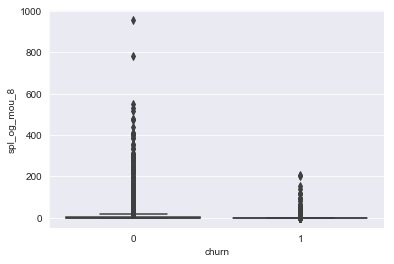

In [227]:
bivariate_plotting(churn_filtered.churn,churn_filtered.spl_og_mou_8)

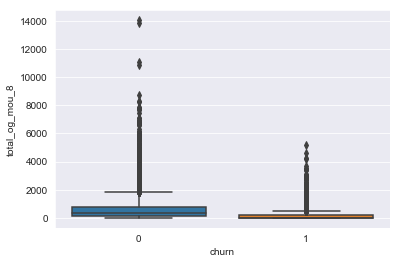

In [228]:
bivariate_plotting(churn_filtered.churn,churn_filtered.total_og_mou_8)

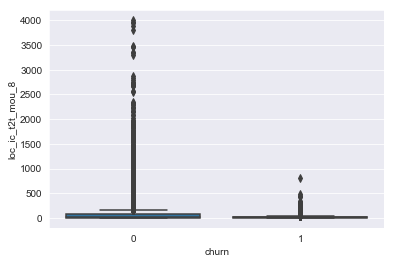

In [229]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_ic_t2t_mou_8)

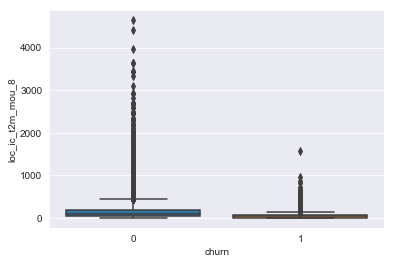

In [230]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_ic_t2m_mou_8)

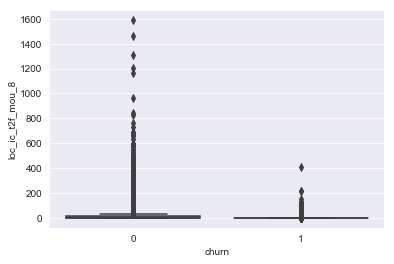

In [231]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_ic_t2f_mou_8)

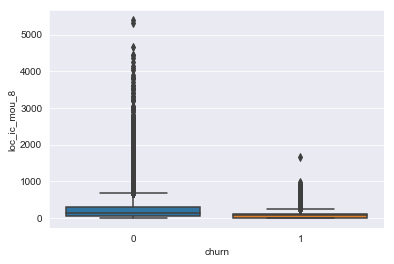

In [232]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_ic_mou_8)

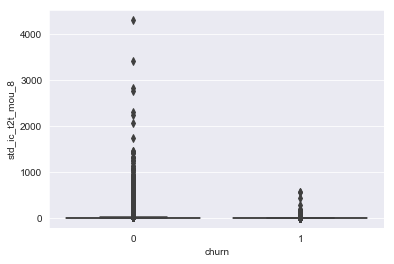

In [233]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_ic_t2t_mou_8)

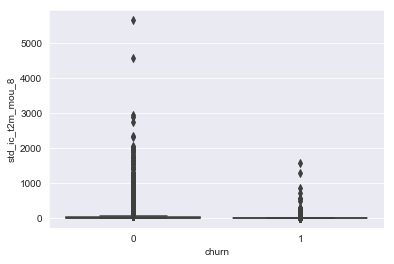

In [234]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_ic_t2m_mou_8)

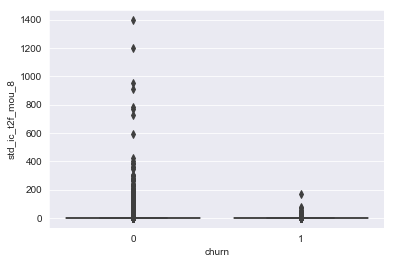

In [235]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_ic_t2f_mou_8)

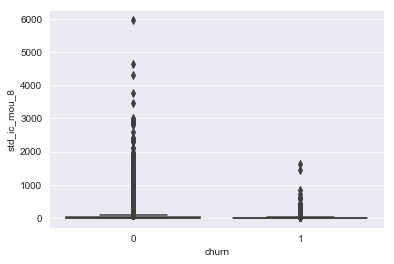

In [236]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_ic_mou_8)

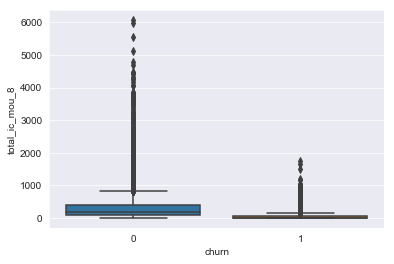

In [237]:
bivariate_plotting(churn_filtered.churn,churn_filtered.total_ic_mou_8)

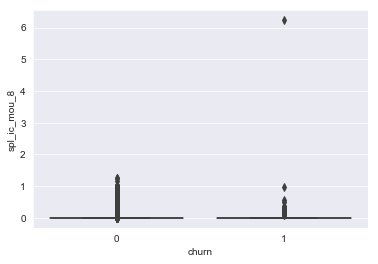

In [238]:
bivariate_plotting(churn_filtered.churn,churn_filtered.spl_ic_mou_8)

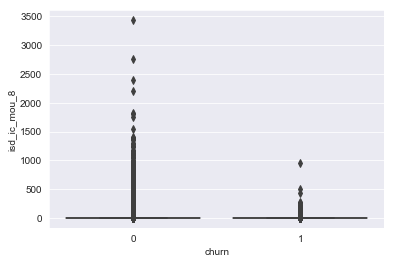

In [239]:
bivariate_plotting(churn_filtered.churn,churn_filtered.isd_ic_mou_8)

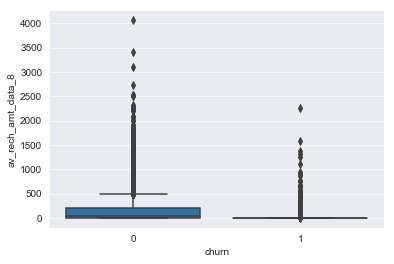

In [240]:
bivariate_plotting(churn_filtered.churn,churn_filtered.av_rech_amt_data_8)

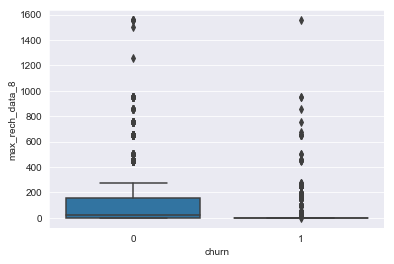

In [241]:
bivariate_plotting(churn_filtered.churn,churn_filtered.max_rech_data_8)

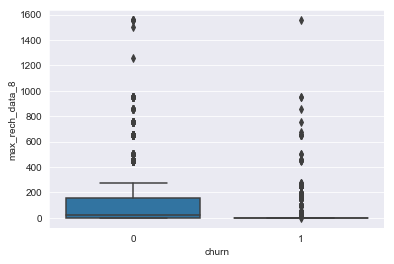

In [242]:
bivariate_plotting(churn_filtered.churn,churn_filtered.max_rech_data_8)

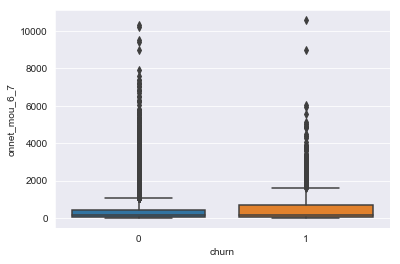

In [243]:
bivariate_plotting(churn_filtered.churn,churn_filtered.onnet_mou_6_7)

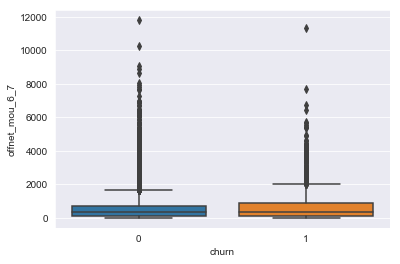

In [244]:
bivariate_plotting(churn_filtered.churn,churn_filtered.offnet_mou_6_7)

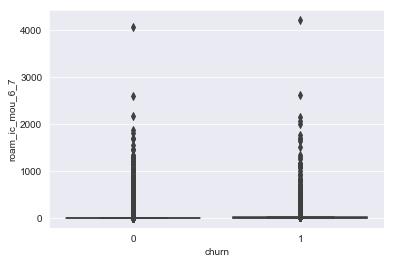

In [245]:
bivariate_plotting(churn_filtered.churn,churn_filtered.roam_ic_mou_6_7)

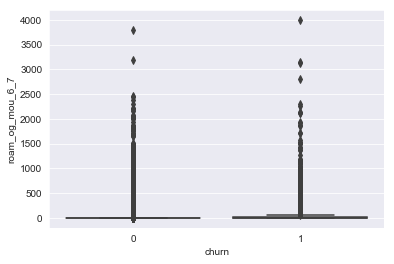

In [246]:
bivariate_plotting(churn_filtered.churn,churn_filtered.roam_og_mou_6_7)

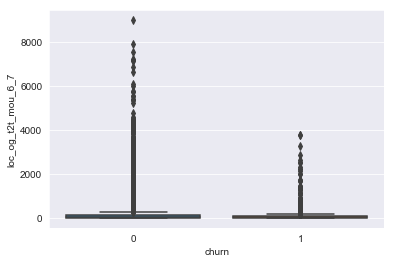

In [247]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_t2t_mou_6_7)

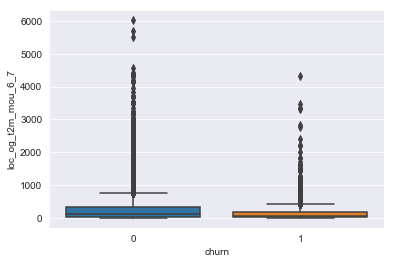

In [248]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_t2m_mou_6_7)

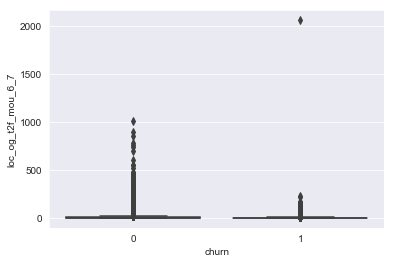

In [249]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_t2f_mou_6_7)

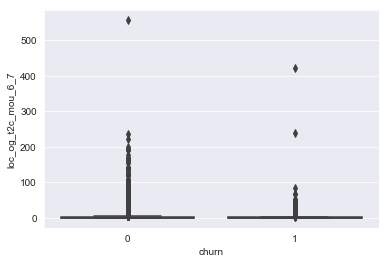

In [250]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_t2c_mou_6_7)

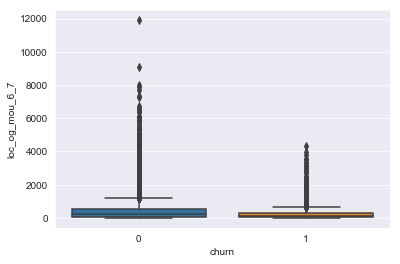

In [251]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_og_mou_6_7)

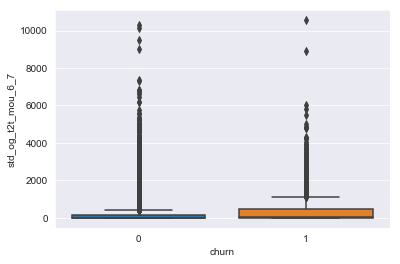

In [252]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_og_t2t_mou_6_7)

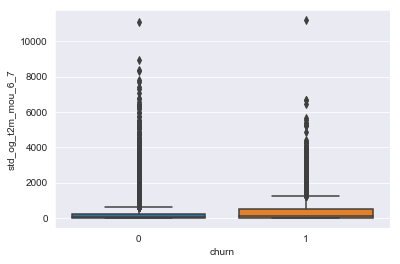

In [253]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_og_t2m_mou_6_7)

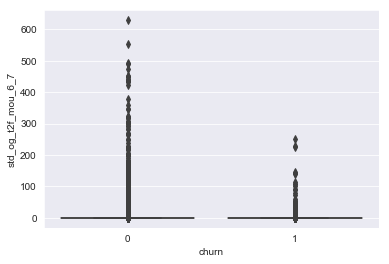

In [254]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_og_t2f_mou_6_7)

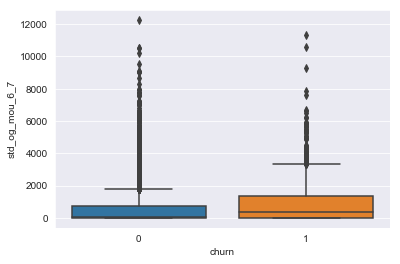

In [255]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_og_mou_6_7)

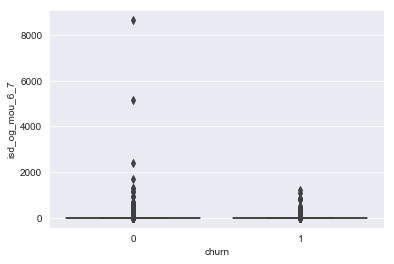

In [256]:
bivariate_plotting(churn_filtered.churn,churn_filtered.isd_og_mou_6_7)

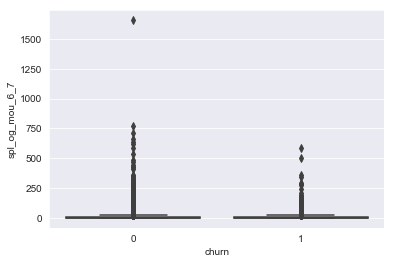

In [257]:
bivariate_plotting(churn_filtered.churn,churn_filtered.spl_og_mou_6_7)

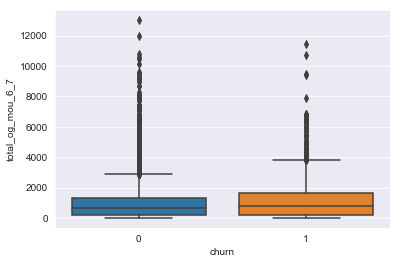

In [258]:
bivariate_plotting(churn_filtered.churn,churn_filtered.total_og_mou_6_7)

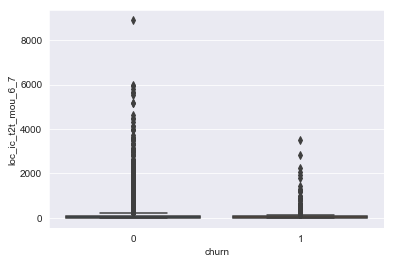

In [259]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_ic_t2t_mou_6_7)

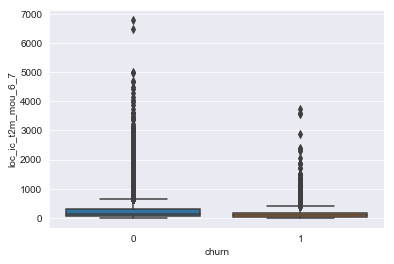

In [260]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_ic_t2m_mou_6_7)

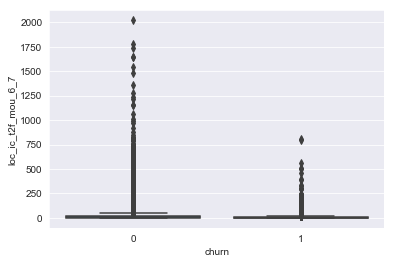

In [261]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_ic_t2f_mou_6_7)

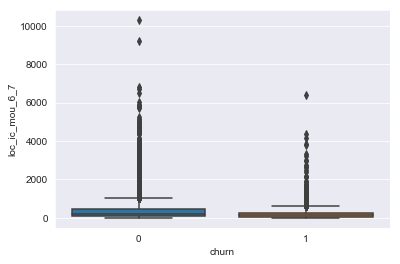

In [262]:
bivariate_plotting(churn_filtered.churn,churn_filtered.loc_ic_mou_6_7)

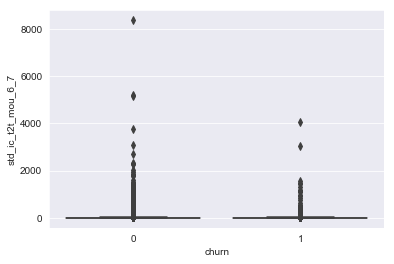

In [263]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_ic_t2t_mou_6_7)

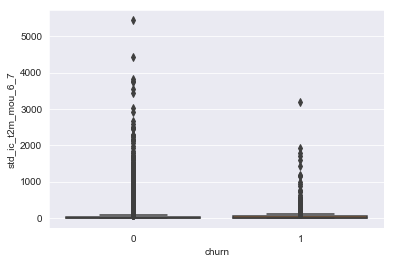

In [264]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_ic_t2m_mou_6_7)

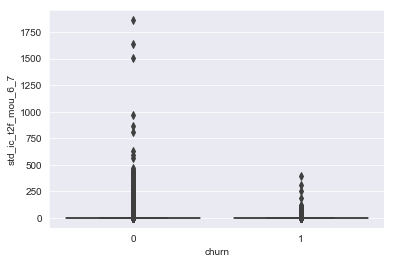

In [265]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_ic_t2f_mou_6_7)

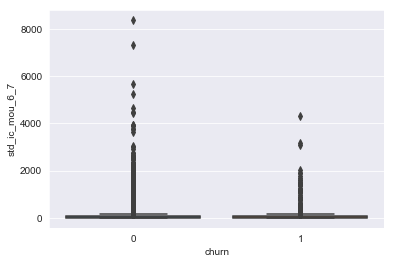

In [266]:
bivariate_plotting(churn_filtered.churn,churn_filtered.std_ic_mou_6_7)

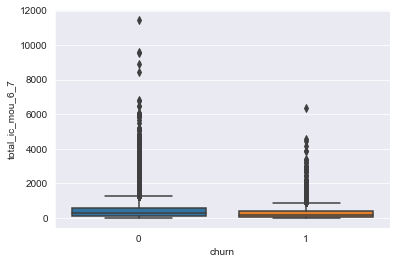

In [267]:
bivariate_plotting(churn_filtered.churn,churn_filtered.total_ic_mou_6_7)

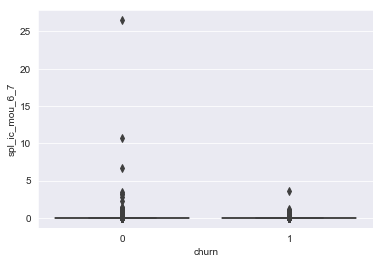

In [268]:
bivariate_plotting(churn_filtered.churn,churn_filtered.spl_ic_mou_6_7)

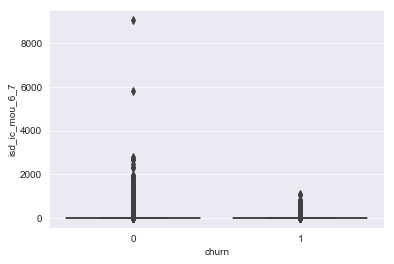

In [269]:
bivariate_plotting(churn_filtered.churn,churn_filtered.isd_ic_mou_6_7)

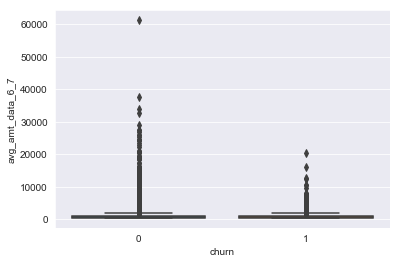

In [270]:
bivariate_plotting(churn_filtered.churn,churn_filtered.avg_amt_data_6_7)

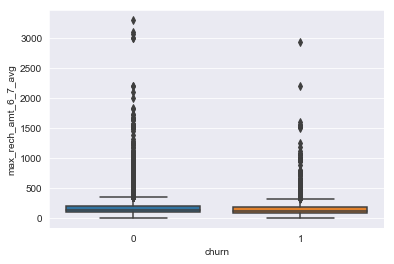

In [271]:
bivariate_plotting(churn_filtered.churn,churn_filtered.max_rech_amt_6_7_avg)

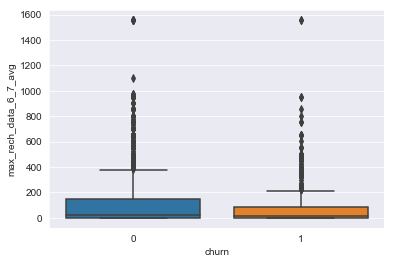

In [272]:
bivariate_plotting(churn_filtered.churn,churn_filtered.max_rech_data_6_7_avg)

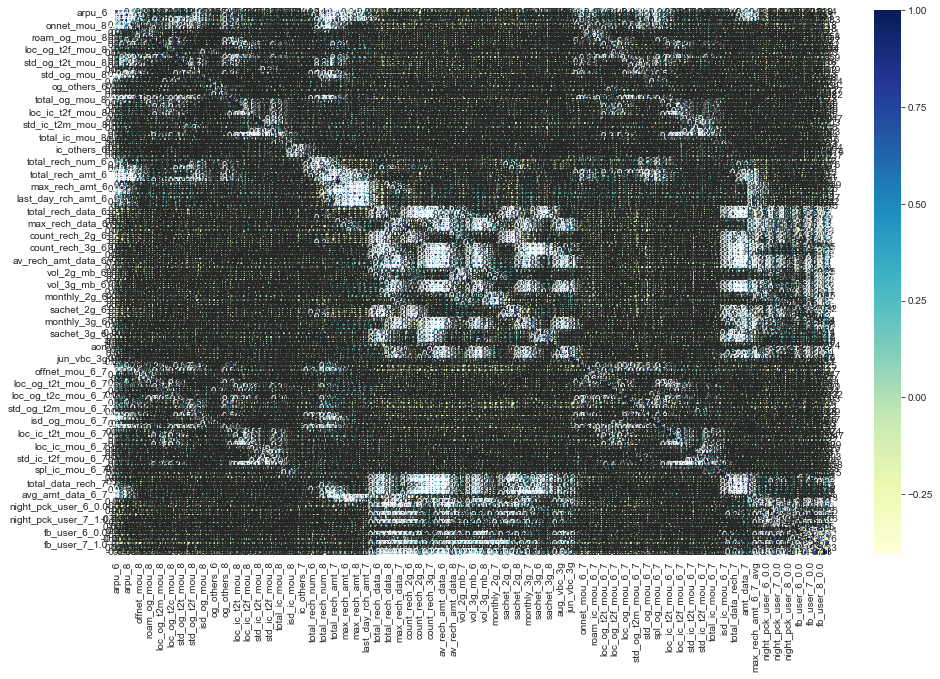

In [273]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(churn_filtered.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see many dark regions in above heat map which indicates high correlation in data.
As there are many features in dataset, manual feature selection by checking VIF is a very time consuming task.
If we use RFE for feature selection, it will elimnate correlated features but along with that we have a high chance of loosing information.

##### Hence, PCA is a good option. PCA will remove multi collinearity and will reduce dimonsionality, still keeps the information by using matrix transformation algorithm.

## Split data to train and test dataset PCA Dataset

In [274]:
churn_filtered.shape

(30001, 133)

In [275]:
# Putting feature variable to X
X = churn_filtered.drop('churn',axis=1)

# Putting target variable to y
y = churn_filtered['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [276]:
print('Shape of X_train Data: ', X_train.shape)
print('Shape of y_train Data: ', y_train.shape)
print('Shape of X_test Data: ', X_test.shape)
print('Shape of y_test Data: ', y_test.shape)

Shape of X_train Data:  (21000, 132)
Shape of y_train Data:  (21000,)
Shape of X_test Data:  (9001, 132)
Shape of y_test Data:  (9001,)


## Scaling numeric variables

In [277]:
#List of columns which are not categorical
num_vars=X_train.columns[~X_train.columns.isin(dummies.columns)]

In [278]:
#We are using minMax scalar for this
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and categorical variables
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

C:\Users\rdawar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rdawar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Scaling test set

In [279]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

C:\Users\rdawar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rdawar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


_Using **SMOTE** to treat class imbalance details fetched from below links_

https://machinelearninimbalanced-data-5b761be45a18gmastery.com/smote-oversampling-for-imbalanced-classification/
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [280]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

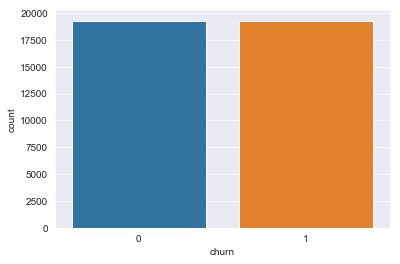

In [281]:
sns.countplot(x=y_train)
plt.show()

In [282]:
print('Shape of train Data: ', X_train.shape)
print('Shape of test Data: ', X_test.shape)

Shape of train Data:  (38578, 132)
Shape of test Data:  (9001, 132)


# Random Forest
We will be using Random forest for identifying variables that effect most in churning customer.
Random forest is an algorithm which is very easy to interpret. So, we have choosen it for variable identification.

#### Train test split for Random forest.

In [212]:
# Putting feature variable to X
X_RF = churn_filtered_RF.drop('churn',axis=1)

# Putting response variable to y
y_RF = churn_filtered_RF['churn']

# Splitting the data into train and test
X_train_RF, X_test__RF, y_train__RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.30, random_state=101)

In [213]:
X_train_RF.head()

arpu_6    arpu_7    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
1100   2091.663  1202.446  1350.458      2046.43        518.83           0.00   
22225   273.314   402.176   233.188        12.28         51.06           0.00   
6385    407.170   808.370   373.500        31.28        288.81         253.09   
22930   590.680  1108.604  1278.728       486.89        967.46           0.00   
7331    414.970   450.448   252.300        25.78        270.18          11.99   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
1100            0.00           2046.06            505.63             11.99   
22225           0.00             12.28             51.06              0.00   
6385          160.81              4.66             82.89             16.31   
22930           0.00            435.16            762.94              4.63   
7331           11.39              9.78            190.09              0.00   

       loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
1100               0.00       2563.69              0.00              1.20   
22225              0.00         63.34              0.00              0.00   
6385               0.00        103.88              2.96             47.69   
22930              0.00       1202.74             51.73            199.88   
7331               0.01        199.88             15.99             68.66   

       std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
1100               0.36          1.56          0.00          0.68   
22225              0.00          0.00          0.00          5.93   
6385               4.73         55.39          0.00          0.00   
22930              0.00        251.61          4.01          4.76   
7331               0.00         84.66          0.00          0.01   

       og_others_6  og_others_7  og_others_8  total_og_mou_8  \
1100          1.61          0.0          0.0         2565.94   
22225         3.44          0.0          0.0           69.28   
6385          0.00          0.0          0.0          159.28   
22930         0.59          0.0          0.0         1463.14   
7331          0.00          0.0          0.0          284.56   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
1100             171.06            182.74            107.59        461.41   
22225             27.33            384.73             19.51        431.58   
6385               6.23             62.48              0.46         69.18   
22930             85.73            314.79             27.19        427.73   
7331              14.71            142.41              0.33        157.46   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
1100               0.00             18.48             49.76         68.24   
22225              0.00              0.00              0.10          0.10   
6385               0.00             48.29              6.69         54.99   
22930              2.65             13.89              0.76         17.31   
7331               0.00             13.34              0.00         13.34   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_6  ic_others_7  \
1100           530.26           0.0          0.00         0.00          0.0   
22225          431.68           0.0          0.00         1.31          0.8   
6385           125.09           0.0          0.85         0.08          0.0   
22930          445.04           0.0          0.00         0.00          0.0   
7331           171.23           0.0          0.00         0.00          0.0   

       ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
1100          0.60                22                14                24   
22225         0.00                12                21                 8   
6385          0.06                 5                 5                 5   
22930         0.00                11                19                19   
7331     

In [214]:
####DO NOT EXECUTE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': [100, 200, 400],
    'min_samples_split': [200, 300, 400],
    'n_estimators': [100,200], 
    'max_features': range(5, 30, 5)
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, return_train_score = True,
                          cv = 3, n_jobs = -1,verbose = 1,scoring="accuracy")

In [215]:
# Fit the grid search to the data
grid_search.fit(X_train_RF, y_train__RF)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 38.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5),
                         'max_features': range(5, 30, 5),
                         'min_samples_leaf': [100, 200, 400],
                         'min_samples_split': [200, 300, 400],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [216]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9440476190476191 using {'max_depth': 12, 'max_features': 25, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


_The above execution took ~30 mins, and the parameters are as follows:_

- 'max_depth': 17
- 'max_features': 25 
- 'min_samples_leaf': 100
- 'min_samples_split': 200
- 'n_estimators': 200

_Accuracy we got is around 91%_

In [217]:
# #do not execute
# # scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).sort_values(by='mean_test_score', ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
253      58.017131      1.514310         0.639506        0.044941   
163      46.489245      0.191704         0.573186        0.043775   
145      37.278600      0.433608         0.574464        0.021985   
324      15.343228      0.381198         0.279586        0.006829   
234      24.120381      0.771504         0.428546        0.015745   
144      19.223126      0.304567         0.395590        0.013673   
342      21.885909      0.348143         0.312497        0.006582   
235      47.711072      0.561280         0.675529        0.062772   
326      14.927403      0.088081         0.263642        0.008798   
256      27.126544      0.606379         0.388461        0.010306   
252      29.489462      1.341029         0.387186        0.035555   
325      30.631643      0.474621         0.449551        0.028123   
343      44.139233      0.109742         0.512720        0.021706   
327      30.610592      0.418484         0.408262        0.007284   
148      18.024381      0.088767         0.375934        0.016493   
162      23.133504      0.142448         0.374000        0.022949   
127      28.427892      0.128605         0.591464        0.017218   
164      22.851195      0.191775         0.369715        0.014447   
255      57.319067      0.061964         0.629875        0.023519   
220      16.633341      0.167672         0.390687        0.026089   
307      21.642270      0.220168         0.449014        0.063312   
216      17.738329      0.404241         0.400297        0.018886   
309      21.830264      0.077014         0.424377        0.022214   
237      47.190382      1.566773         0.640711        0.018877   
347      41.513632      0.885243         0.411899        0.006359   
130      13.898890      0.064326         0.366642        0.026436   
108      13.427383      0.041143         0.469777        0.010711   
146      18.432474      0.404373         0.411468        0.052330   
131      27.320799      0.137158         0.553062        0.018251   
254      28.478855      1.480869         0.375401        0.004835   
345      43.404615      1.062747         0.445476        0.003083   
168      20.908581      0.175175         0.385481        0.028106   
239      44.249846      0.694880         0.610642        0.020759   
167      44.296792      0.428187         0.535517        0.019393   
157      31.291675      1.144288         0.567466        0.006645   
166      22.412801      0.166838         0.386437        0.031001   
293      14.582952      0.190867         0.388959        0.011996   
147      36.904072      0.436283         0.559424        0.015848   
306      11.059943      0.086578         0.268639        0.015113   
165      45.295121      0.468119         0.555846        0.039760   
170      21.249841      0.276340         0.408923        0.045193   
217      34.890769      0.473172         0.638419        0.004210   
126      14.376026      0.081359         0.401800        0.022737   
344      22.043308      0.593855         0.342750        0.056326   
128      14.298878      0.073306         0.376974        0.016625   
329      29.863797      0.418347         0.403695        0.007489   
219      33.960911      0.451345         0.627969        0.020719   
292       6.980079      0.089980         0.252325        0.013405   
313      18.335294      0.287346         0.388960        0.031758   
77       16.603211      0.448370         0.487672        0.025507   
72        7.993543      0.065337         0.338585        0.004662   
156      15.243649      0.095211         0.368528        0.011624   
155      35.046145      0.747022         0.627803        0.075531   
264      17.893336      1.817023         0.318842        0.125418   
150      17.501316      0.333568         0.371142        0.004848   
201      22.740777      0.261493         0.636779        0.023284   
249      31.909405      1.211493         0.577606        0.087739   
289



#### Model with best Hyperparameters
Let's use the resulst above and create a RF model to identify top 10 features to predict customer churn.

From above results, we chose the one with lower values of Max_depth, max_feature speciacially as it will help us in reducing model complexity without loosing much or anything in accuracy.

In [218]:
# Running the random forest with best parameters.
rfc = RandomForestClassifier(n_estimators=200, max_depth = 17, max_features = 25, min_samples_leaf = 100, min_samples_split = 200)

In [219]:
# fit
rfc.fit(X_train_RF,y_train__RF)

RandomForestClassifier(max_depth=17, max_features=25, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

In [220]:
# Making predictions on test dataset
predictions = rfc.predict(X_test__RF)

In [221]:
# Let's check the report of our default model
print(classification_report(y_test_RF,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8271
           1       0.72      0.47      0.57       730

    accuracy                           0.94      9001
   macro avg       0.84      0.73      0.77      9001
weighted avg       0.94      0.94      0.94      9001



In [222]:
print("We get accuracy of ",accuracy_score(y_test_RF,predictions) , "on test dataset")

We get accuracy of  0.9423397400288857 on test dataset


### Let's find out top 10 variables with 2 differnt ways.
We have used RF tree view and Importance indices methods to identify Top 10 best features.

In [223]:
#Using SelectFromModel to get importance indices for eact feature
sel = SelectFromModel(RandomForestClassifier(n_estimators=200, max_depth = 77, max_features = 25, min_samples_leaf = 100, min_samples_split = 200))
#Fit SelectFromModel
sel.fit(X_train_RF, y_train__RF)

#This will give a boolean result for each feature, if it is important in prediction or not
sel.get_support()

array([False, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [224]:
#Print total important features as per SelectFromModel
selected_feat= X_train_RF.columns[(sel.get_support())]
len(selected_feat)

22

In [225]:
#List feature names which are important
print(selected_feat)

Index(['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'night_pck_user_8', 'fb_user_8'],
      dtype='object')


### Let's see the TOP 10 Features with help of a Bar chart

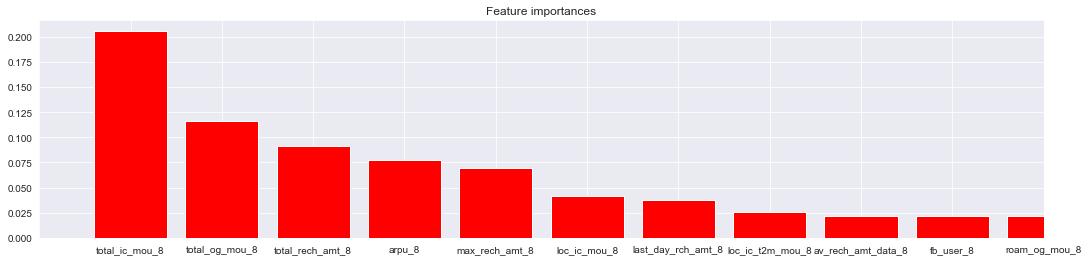

In [226]:
#Assigning feature importance score to plot bars and y-axis
importances = sel.estimator_.feature_importances_

#Sort and assign feature index in dataset to plot it on X-axis
indices = np.argsort(importances)[::-1]

#Plot values
plt.figure(figsize=(18,4))
plt.title("Feature importances")
plt.bar(range(X_RF.shape[1]), importances[indices],
       color="r", align="center")


plt.xticks(range(X_RF.shape[1]), X_train_RF.columns.get_values()[indices])
plt.xlim([-1, 10])
plt.show()

In [227]:
print("As per above model, we found ", X_train_RF.columns.get_values()[indices][:10], " as top 10 important features")

As per above model, we found  ['total_ic_mou_8' 'total_og_mou_8' 'total_rech_amt_8' 'arpu_8'
 'max_rech_amt_8' 'loc_ic_mou_8' 'last_day_rch_amt_8' 'loc_ic_t2m_mou_8'
 'av_rech_amt_data_8' 'fb_user_8']  as top 10 important features


### GOOD INFO: We see in above output all the features are from 8th month which is the action month

### We will also see the tree view below and try to see how many are matching and which once make more sense as per business

In [228]:
# Pull out one tree from the forest
tree = rfc.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train_RF.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

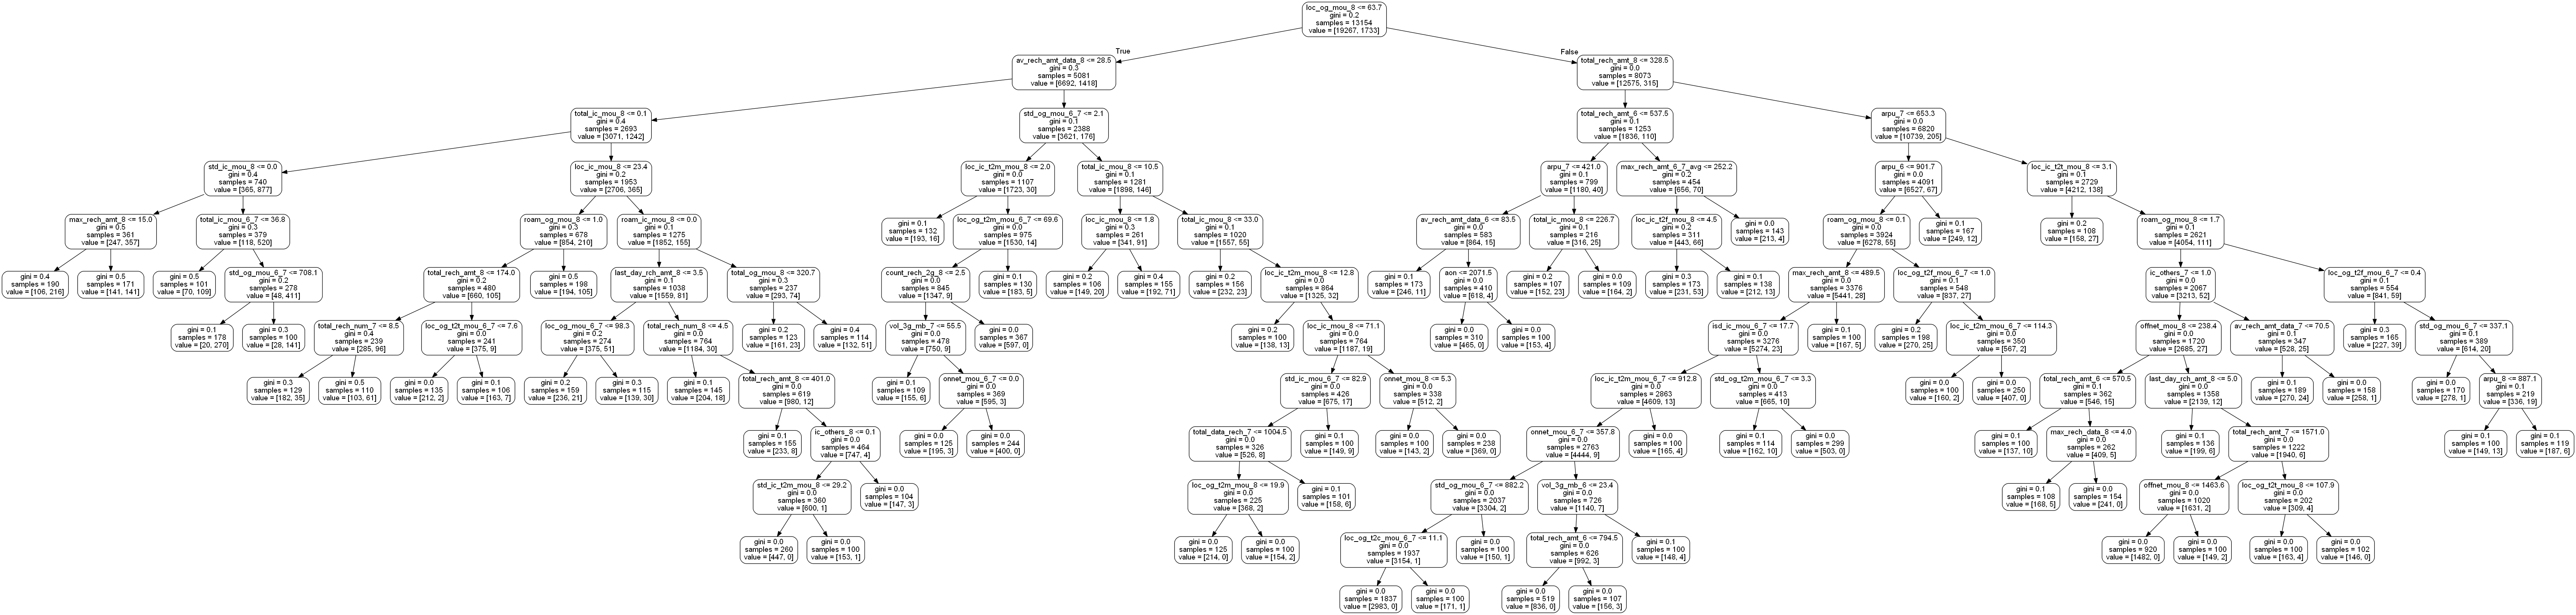

In [229]:
# from IPython.display import Image
Image(filename='tree.png') 

These are the max_rech_amt_8, total_ic_mou,total_ic_t2m_mou_8,loc_ic_t2t_mou_8,loc_og_mou_8 five features matching from both output.

#### As per analysis, 'total_ic_mou_8' 'total_og_mou_8' 'total_rech_amt_8' 'max_rech_amt_8','arpu_8' 'last_day_rch_amt_8' 'loc_ic_mou_8' 'loc_ic_t2m_mou_8','loc_og_mou_8' 'av_rech_amt_data_8' : These are the top 10 features we can monitor / action on to reduce customer churn

# PCA 

In [230]:
#Create an object for PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [231]:
#Doing the PCA on the train data
X_train_pca = pca.fit(X_train)

In [232]:
pca.components_

array([[-3.59015867e-03, -1.73670784e-03,  2.47613484e-04, ...,
         4.34203748e-01, -8.86612702e-03,  3.76021719e-01],
       [-1.05921641e-04,  4.77686109e-03,  7.88655698e-03, ...,
         3.13702562e-02,  8.66863500e-02,  4.52823706e-01],
       [ 5.65162157e-03, -1.85936558e-03,  2.65372055e-03, ...,
        -5.28801394e-01,  8.99137345e-02,  2.71839920e-01],
       ...,
       [-0.00000000e+00, -8.08605924e-16,  4.20835844e-16, ...,
         4.98336476e-17, -1.15721024e-16, -1.43021228e-16],
       [-0.00000000e+00, -2.02815995e-16, -2.21989293e-16, ...,
        -2.25885524e-17,  2.82666644e-17,  9.47156225e-17],
       [ 0.00000000e+00, -3.06927420e-14,  5.34377409e-15, ...,
         1.10860018e-15,  7.64667397e-16,  6.49162563e-16]])

In [233]:
pca.explained_variance_ratio_

array([5.45989176e-01, 1.30367522e-01, 9.16701438e-02, 5.96475204e-02,
       2.59050437e-02, 2.47131759e-02, 1.79129037e-02, 1.30290313e-02,
       1.08012500e-02, 1.02545728e-02, 6.90658915e-03, 6.14946596e-03,
       5.24701248e-03, 4.47058295e-03, 4.17043360e-03, 3.35396447e-03,
       2.73389267e-03, 2.60697474e-03, 2.20790945e-03, 2.03996367e-03,
       1.97049520e-03, 1.79693870e-03, 1.78028213e-03, 1.58922344e-03,
       1.35242513e-03, 1.33934904e-03, 1.23886633e-03, 1.16659088e-03,
       1.07589335e-03, 1.03577869e-03, 9.27777293e-04, 8.90747260e-04,
       7.95727183e-04, 7.73518864e-04, 7.43102518e-04, 6.91059046e-04,
       5.54776894e-04, 5.40297492e-04, 5.36727475e-04, 4.98724675e-04,
       4.78664347e-04, 4.39750596e-04, 4.31173721e-04, 3.94792972e-04,
       3.74755924e-04, 3.13488147e-04, 3.03345156e-04, 2.88761235e-04,
       2.75248131e-04, 2.71597607e-04, 2.59014613e-04, 2.38231257e-04,
       2.29310664e-04, 2.24203456e-04, 2.18536518e-04, 2.14213762e-04,
      

In [234]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([54.6 , 67.64, 76.81, 82.77, 85.36, 87.83, 89.62, 90.92, 92.  ,
       93.03, 93.72, 94.33, 94.85, 95.3 , 95.72, 96.06, 96.33, 96.59,
       96.81, 97.01, 97.21, 97.39, 97.57, 97.73, 97.87, 98.  , 98.12,
       98.24, 98.35, 98.45, 98.54, 98.63, 98.71, 98.79, 98.86, 98.93,
       98.99, 99.04, 99.09, 99.14, 99.19, 99.23, 99.27, 99.31, 99.35,
       99.38, 99.41, 99.44, 99.47, 99.5 , 99.53, 99.55, 99.57, 99.59,
       99.61, 99.63, 99.65, 99.67, 99.69, 99.71, 99.73, 99.75, 99.77,
       99.78, 99.79, 99.8 , 99.81, 99.82, 99.83, 99.84, 99.85, 99.86,
       99.87, 99.88, 99.89, 99.9 , 99.91, 99.92, 99.93, 99.93, 99.93,
       99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93,
       99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93,
       99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93,
       99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93,
       99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93, 99.93,
       99.93, 99.93,

In [235]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

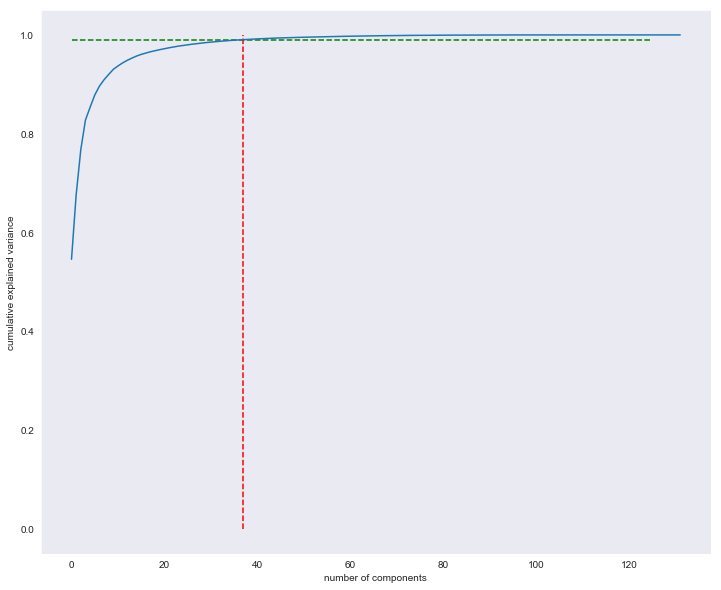

In [241]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=37, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=.99, xmax=125, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [242]:
#Creating PCA with 37 variables which explains almost 99% of variance in data with reducing dimosionality.
pca_final = IncrementalPCA(n_components=37)
n_components = 37

In [243]:
# Fit PCA on Train data
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(38578, 37)

In [244]:
# Let's see correlation between PCA componets.
# Expected to be no correlation
corrmat = np.corrcoef(X_train_pca.transpose())

In [245]:
corrmat.shape

(37, 37)

Plotting the heatmap of the corr matrix
We can clearly see, there is no correaltion between PCA components

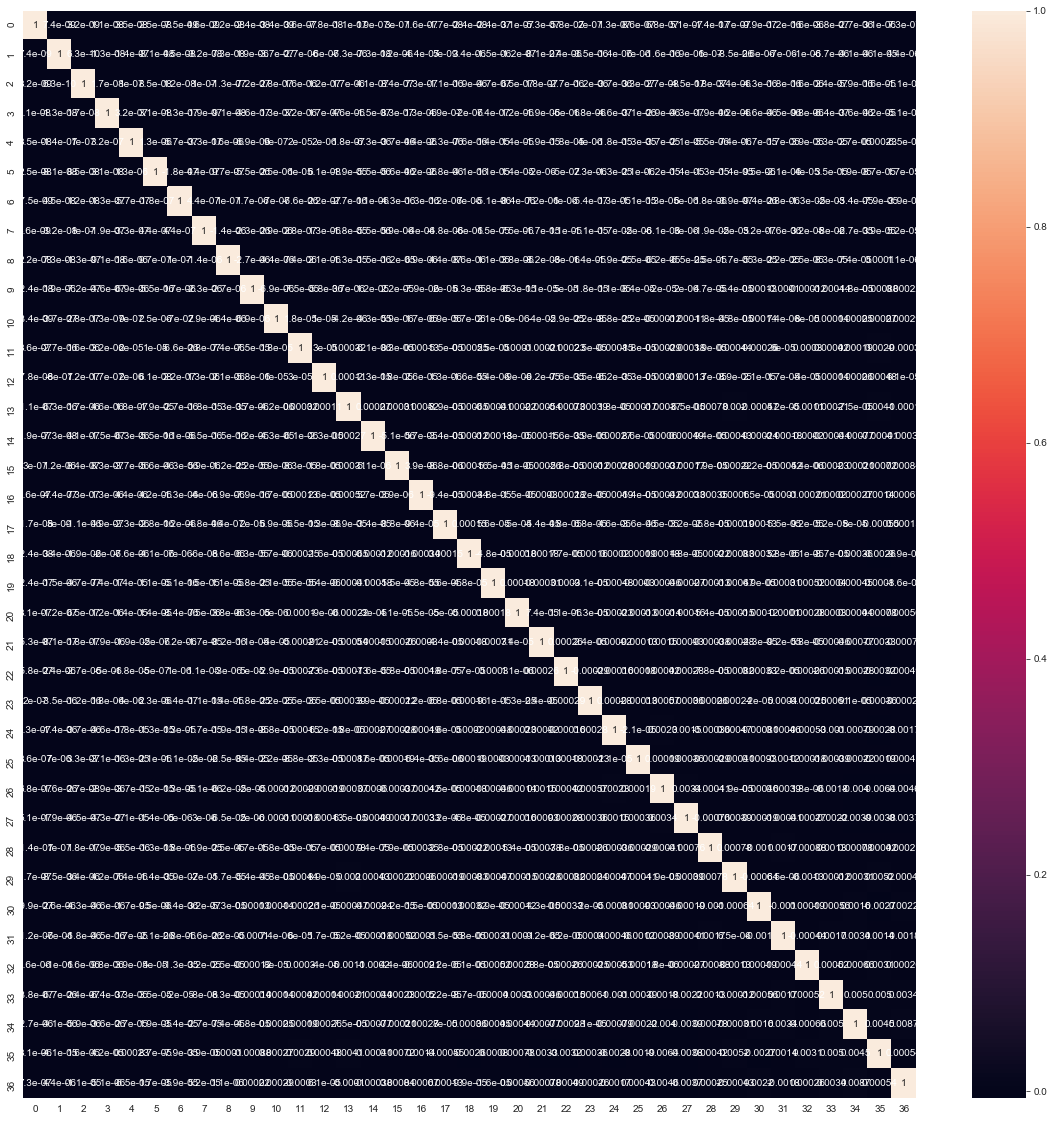

In [246]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)
plt.show()

In [247]:
#Fitting PCA on TEST data
X_test_pca = pca_final.transform(X_test)

X_test_pca.shape

(9001, 37)

In [248]:
X_test_pca

array([[ 1.41466203e+00,  1.87703658e-01, -9.23262860e-02, ...,
        -7.29196754e-03, -9.36046627e-03,  4.21153626e-03],
       [ 5.30615219e-01,  1.51035699e-01, -1.25332086e+00, ...,
        -3.83778762e-03,  5.89841189e-03, -7.96827849e-02],
       [-1.06774135e+00,  8.70345852e-02,  2.10782677e-02, ...,
        -1.61375626e-02,  2.36590997e-03,  1.81632787e-02],
       ...,
       [-1.07897836e+00,  9.81134851e-02,  1.91029608e-02, ...,
        -3.40636219e-03, -2.29793025e-02, -3.78124007e-04],
       [ 1.38721760e+00,  1.86655597e-01, -1.03297697e-01, ...,
        -8.20228555e-03,  1.65934011e-02, -1.23729319e-02],
       [-1.95472094e-01,  1.68322592e-01,  1.12687331e+00, ...,
        -1.47668356e-02, -1.73590640e-02, -1.07521812e-03]])

# Model Building with PCA

### Model 1 Gradient boosting
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [249]:
# Setting hyper parameters for Gradient boost model
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

#Creating object for GBC
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200) 

#Cross validation with 3 folds
folds = 3

#Create grid search with 3 fold validation
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'accuracy', 
                               return_train_score=True,
                               n_jobs=-1,
                               verbose = 1)

#Fit multiple models
grid_search_GBC.fit(X_train_pca,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  3.7min finished


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [250]:
#Dataframe with gridsearch results
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      26.398821      0.176832         0.069149        0.003761   
1      55.858960      0.236014         0.094415        0.004908   
2      86.727144      1.337863         0.071492        0.001222   
3      28.949356      0.012882         0.070144        0.005170   
4      59.396120      0.252325         0.076129        0.002488   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.846967   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.849145   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.848989   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.843701   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.858709   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.859009           0.858776         0.854918        0.005622   
1           0.860876           0.862042         0.857354        0.005825   
2           0.859476           0.861264         0.856576        0.005415   
3           0.857921           0.856132         0.852585        0.006324   
4           0.875107           0.867797         0.867204        0.006707   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.872696            0.865586   
1                5            0.875651            0.867024   
2                6            0.872968            0.867958   
3                8            0.878218            0.875578   
4                3            0.899331            0.897547   

   split2_train_score  mean_train_score  std_train_score  
0            0.868541          0.868941         0.002917  
1            0.869280          0.870652         0.003653  
2            0.868152          0.869693         0.002318  
3            0.878378          0.877391         0.001284  
4            0.894903          0.897260         0.001819

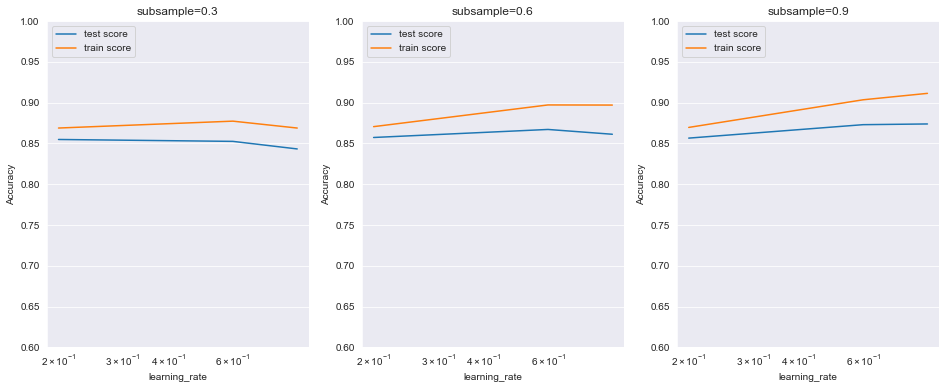

In [251]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('Accuracy')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [252]:
#From above plot it is infered , learning rate "0.2" is best with "0.6" subsample giving "95%" accuracy.
folds = 3
param_grid = {"learning_rate": [0.2],
              "subsample": [0.6]
             }
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                            param_grid= param_grid,
                               scoring = 'accuracy', 
                               return_train_score=True,
                               n_jobs=-1,
                               verbose = 1)

grid_search_GBC.fit(X_train_pca,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.7s finished


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  n_estimators=200),
             n_jobs=-1, param_grid={'learning_rate': [0.2], 'subsample': [0.6]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [253]:
# predict
predictions_test_GBC = grid_search_GBC.predict(X_test_pca)
print(classification_report(y_test,predictions_test_GBC))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8271
           1       0.30      0.76      0.43       730

    accuracy                           0.84      9001
   macro avg       0.64      0.80      0.67      9001
weighted avg       0.92      0.84      0.87      9001



In [254]:
#print confusion matirx
confusion = metrics.confusion_matrix( y_test,predictions_test_GBC )
confusion

array([[6979, 1292],
       [ 177,  553]], dtype=int64)

In [255]:
metrics.accuracy_score( y_test, predictions_test_GBC )

0.8367959115653816

In [256]:
train_y_pred = grid_search_GBC.predict(X_train_pca)

auc = roc_auc_score(y_train, train_y_pred)
print("Performance for train : ", auc)

Performance for train :  0.8692259837212921


In [257]:
test_y_pred = grid_search_GBC.predict(X_test_pca)

auc = roc_auc_score(y_test, test_y_pred)
print("Performance for test : ", auc)

Performance for test :  0.800662903725345


### Model 2 Xgboost

In [258]:
XGB = xgb.XGBRegressor(n_estimators=1000)
XGB.fit(X_train_pca, y_train, early_stopping_rounds=2, eval_set=[(X_test_pca, y_test)], verbose=False)

C:\Users\rdawar\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:36:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [259]:
#model Evalution on training data
train_y_pred = XGB.predict(X_train_pca)

In [260]:
auc = roc_auc_score(y_train, train_y_pred)
print("Performance for train : ", auc)

Performance for train :  0.9355804753539633


In [261]:
#model evualation on test data
y_pred_xgb = XGB.predict(X_test_pca)
auc = roc_auc_score(y_test, y_pred_xgb)
print("Performance for test : ", auc)

Performance for test :  0.8696597949925717


In [262]:
#hyperparameter tunning
scale_pos_weight = [1,5,10,20,25,30,35,40,50,60]
for i in scale_pos_weight:
    print('-----------------------------------------------------')
    print('scale_pos_weight = {}: '.format(i))
    clf = xgb.XGBClassifier(scale_pos_weight=i)
    clf.fit(X_train_pca, y_train)
    predict_test = clf.predict(X_test_pca)
    predict_train = clf.predict(X_train_pca)
    proba = clf.predict_proba(X_test_pca)
    cm_test = confusion_matrix(y_test, predict_test)
    cm_train = confusion_matrix(y_train, predict_train)
    auc_train = roc_auc_score(y_train, predict_train)
    auc_test = roc_auc_score(y_test, predict_test)
    print('Accuracy Score')
    print(accuracy_score(y_test, predict_test))
    print('Confusion Matrix-train: \n', cm_train)
    print('AUC-train: \n', auc_train)
    print('Confusion Matrix-test: \n', cm_test)
    print('AUC-test: \n', auc_test)
    print('Specificity : %', round(100 * (cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]))))
    print('Sensitivity-Recall : %', round(100* (cm_test[1][1]/(cm_test[1][0]+cm_test[1][1]))))
    print(classification_report(y_test,predict_test))
    print('-----------------------------------------------------')

-----------------------------------------------------
scale_pos_weight = 1: 
Accuracy Score
0.8357960226641484
Confusion Matrix-train: 
 [[16460  2829]
 [ 2789 16500]]
AUC-train: 
 0.8543729586811136
Confusion Matrix-test: 
 [[6977 1294]
 [ 184  546]]
AUC-test: 
 0.7957474788127523
Specificity : % 84.0
Sensitivity-Recall : % 75.0
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8271
           1       0.30      0.75      0.42       730

    accuracy                           0.84      9001
   macro avg       0.64      0.80      0.66      9001
weighted avg       0.92      0.84      0.87      9001

-----------------------------------------------------
-----------------------------------------------------
scale_pos_weight = 5: 
Accuracy Score
0.5636040439951117
Confusion Matrix-train: 
 [[10508  8781]
 [  263 19026]]
AUC-train: 
 0.7655658665560683
Confusion Matrix-test: 
 [[4393 3878]
 [  50  680]]
AUC-test: 
 0.731319861605908
Speci

In [263]:
#selcting the best one as per performance!
scale_pos_weight = [1]
for i in scale_pos_weight:
    print('-----------------------------------------------------')
    print('scale_pos_weight = {}: '.format(i))
    clf = xgb.XGBClassifier(scale_pos_weight=i)
    clf.fit(X_train_pca, y_train)
    predict_test = clf.predict(X_test_pca)
    predict_train = clf.predict(X_train_pca)
    proba = clf.predict_proba(X_test_pca)
    cm_test = confusion_matrix(y_test, predict_test)
    cm_train = confusion_matrix(y_train, predict_train)
    auc_train = roc_auc_score(y_train, predict_train)
    auc_test = roc_auc_score(y_test, predict_test)
    print('Accuracy Score')
    print(accuracy_score(y_test, predict_test))
    print('Confusion Matrix-train: \n', cm_train)
    print('AUC-train: \n', auc_train)
    print('Confusion Matrix-test: \n', cm_test)
    print('AUC-test: \n', auc_test)
    print('Specificity : %', round(100 * (cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]))))
    print('Sensitivity-Recall : %', round(100* (cm_test[1][1]/(cm_test[1][0]+cm_test[1][1]))))
    print(classification_report(y_test,predict_test))
    print('-----------------------------------------------------')

-----------------------------------------------------
scale_pos_weight = 1: 
Accuracy Score
0.8357960226641484
Confusion Matrix-train: 
 [[16460  2829]
 [ 2789 16500]]
AUC-train: 
 0.8543729586811136
Confusion Matrix-test: 
 [[6977 1294]
 [ 184  546]]
AUC-test: 
 0.7957474788127523
Specificity : % 84.0
Sensitivity-Recall : % 75.0
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8271
           1       0.30      0.75      0.42       730

    accuracy                           0.84      9001
   macro avg       0.64      0.80      0.66      9001
weighted avg       0.92      0.84      0.87      9001

-----------------------------------------------------


## Model 3 Logistic Regression

In [264]:
#Creating an object for logistic regression
learner_pca = LogisticRegression()

#Fitting model on X_train_pca
#X_train_pca has 37 PCA components which explaince 99% of variance in data
model_pca = learner_pca.fit(X_train_pca, y_train)

#Prdict probability scores on train data
Train_Predict=model_pca.predict_proba(X_train_pca)[:,1]

C:\Users\rdawar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [265]:
#Convert array outputs to dataframe
Train_Predict=pd.DataFrame(Train_Predict,columns=['Churn_Prob'])
y_train=pd.DataFrame(y_train,columns=['churn'])

In [266]:
#Creating a final dataframe with original churn and predicted probablity
y_train_pred_final=pd.DataFrame({'Churn':y_train['churn']},index=y_test.index)
y_train_pred_final.reset_index(drop=True, inplace=True)
# Appending y_train_df and Train_Predict
y_train_pred_final = pd.concat([y_train_pred_final, Train_Predict],axis=1)

y_train_pred_final.head()

Churn  Churn_Prob
0     0    0.006447
1     1    0.055755
2     0    0.788934
3     1    0.011742
4     0    0.363052

In [267]:
#Creating a final dataframe with original churn and predicted probablity
y_train_pred_final = pd.DataFrame({'Churn':y_train['churn'], 'Churn_Prob':Train_Predict['Churn_Prob']})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  ID
0     0    0.006447   0
1     0    0.055755   1
2     0    0.788934   2
3     0    0.011742   3
4     0    0.363052   4

### Finding Optimal Cutoff Point

### We need to find best cut off probablity to identify which gives us best results which could be used by business to take action

To find results at different cutoff we will plot ROC curve for True positive and false positive rate

In [268]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [269]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

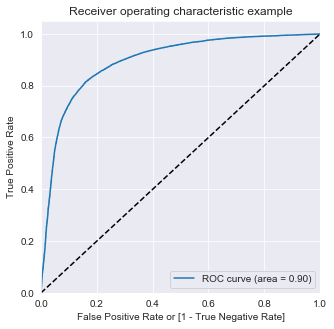

In [270]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

#### But, considering business requirement, we are more concerned about higher sensitivity by compromising on specificity and accuracy.
#### Which means, even if customers who will not churn are predicted as churn is fine with us. But, we need maximum customers from churn group to be identified as churn.

In [271]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0     0    0.006447   0    1    0    0    0    0    0    0    0    0    0
1     0    0.055755   1    1    0    0    0    0    0    0    0    0    0
2     0    0.788934   2    1    1    1    1    1    1    1    1    0    0
3     0    0.011742   3    1    0    0    0    0    0    0    0    0    0
4     0    0.363052   4    1    1    1    1    0    0    0    0    0    0

In [272]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.667920  0.980818  0.355021
0.2   0.2  0.738452  0.955622  0.521282
0.3   0.3  0.782959  0.926798  0.639121
0.4   0.4  0.809088  0.888641  0.729535
0.5   0.5  0.823215  0.843279  0.803152
0.6   0.6  0.823760  0.780704  0.866815
0.7   0.7  0.805900  0.697652  0.914148
0.8   0.8  0.753668  0.557520  0.949816
0.9   0.9  0.585800  0.186427  0.985173


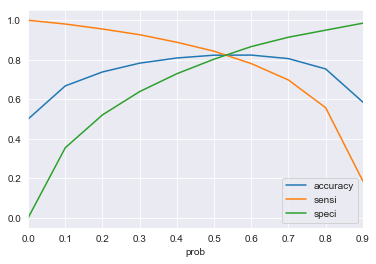

In [273]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### As per above analysis, we can see 0.5 seems to best cut off.
#### But, as per business requirement, sensitivity is more important than accuracy and specificity.
### Hence, we have cosen 0.3 as cutoff which gives us ~92% sensitivity with not dropping specificity and accuracy much

In [274]:

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0     0    0.006447   0    1    0    0    0    0    0    0    0    0    0   
1     0    0.055755   1    1    0    0    0    0    0    0    0    0    0   
2     0    0.788934   2    1    1    1    1    1    1    1    1    0    0   
3     0    0.011742   3    1    0    0    0    0    0    0    0    0    0   
4     0    0.363052   4    1    1    1    1    0    0    0    0    0    0   

   predicted  
0          0  
1          0  
2          1  
3          0  
4          1

In [275]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[12328  6961]
 [ 1412 17877]]


In [276]:
# Predicted     not_churn    churn
# Actual
# not_churn        12319       6970
# churn            1423       17886  

### Predict on test dataset

In [277]:
Test_Predict=model_pca.predict_proba(X_test_pca)[:,1]

In [278]:
Test_Predict=pd.DataFrame(Test_Predict,columns=['Churn_Prob'])

In [279]:
y_test=pd.DataFrame(y_test,columns=['churn'])

In [280]:
#Creating test prediction dataframe
y_test_pred_final=pd.DataFrame({'Churn':y_test['churn']},index=y_test.index)
y_test_pred_final.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_pred_final, Test_Predict],axis=1)

y_test_pred_final

Churn  Churn_Prob
0        0    0.223540
1        0    0.003259
2        1    0.948943
3        0    0.529336
4        0    0.140963
5        0    0.045352
6        0    0.001444
7        0    0.178194
8        0    0.081550
9        1    0.497652
10       0    0.343081
11       0    0.897090
12       0    0.000869
13       0    0.342373
14       0    0.811042
15       0    0.844238
16       0    0.810833
17       0    0.087375
18       0    0.444835
19       0    0.267247
20       0    0.026443
21       0    0.026728
22       0    0.683874
23       0    0.709986
24       0    0.581231
25       0    0.064257
26       0    0.646725
27       0    0.125965
28       0    0.863544
29       0    0.090112
30       0    0.012262
31       0    0.380016
32       0    0.893669
33       0    0.777639
34       0    0.057435
35       1    0.841897
36       0    0.143539
37       0    0.772557
38       0    0.012829
39       0    0.055806
40       0    0.510245
41       1    0.815495
42       0    0.163691
43       0    0.179848
44       0    0.335507
45       0    0.334154
46       0    0.628487
47       0    0.020267
48       0    0.165937
49       0    0.000783
50       0    0.289855
51       0    0.146882
52       0    0.173837
53       0    0.614626
54       0    0.610582
55       0    0.069982
56       0    0.359791
57       0    0.767729
58       0    0.081967
59       0    0.068747
60       0    0.203662
61       0    0.157942
62       0    0.176298
63       0    0.334931
64       1    0.590176
65       0    0.119066
66       0    0.629891
67       0    0.990211
68       0    0.001445
69       0    0.016382
70       0    0.425943
71       0    0.005804
72       0    0.099751
73       0    0.308420
74       1    0.884849
75       0    0.267549
76       0    0.223666
77       0    0.590538
78       0    0.068581
79       0    0.158358
80       1    0.859357
81       0    0.698295
82       0    0.164093
83       0    0.343389
84       0    0.004752
85       0    0.139090
86       0    0.775412
87       1    0.877434
88       1    0.873574
89       1    0.857070
90       0    0.555506
91       0    0.120089
92       0    0.001366
93       0    0.095724
94       0    0.651952
95       0    0.073081
96       0    0.249138
97       0    0.004586
98       0    0.196795
99       0    0.473223
100      0    0.017516
101      0    0.773653
102      0    0.937158
103      0    0.015417
104      0    0.607807
105      1    0.861088
106      1    0.022772
107      0    0.380195
108      0    0.020946
109      0    0.815867
110      0    0.170108
111      0    0.062413
112      1    0.892203
113      0    0.170965
114      0    0.432015
115      0    0.012268
116      0    0.446625
117      0    0.225666
118      0    0.897553
119      0    0.130699
120      0    0.163881
121      0    0.483672
122      0    0.237577
123      0    0.003236
124      0    0.584423
125      0    0.292720
126      0    0.054933
127      0    0.550793
128      0    0.793198
129      0    0.088704
130      0    0.041823
131      0    0.144737
132      0    0.192108
133      0    0.748290
134      0    0.631084
135      1    0.628315
136      0    0.052181
137      0    0.116616
138      0    0.467277
139      0    0.000447
140      0    0.015267
141      0    0.287406
142      0    0.217008
143      0    0.017835
144      0    0.255602
145      0    0.060764
146      0    0.133096
147      0    0.715833
148      0    0.004172
149      0    0.001836
...    ...         ...
8851     0    0.190198
8852     0    0.468682
8853     0    0.027722
8854     0    0.230803
8855     0    0.123526
8856     0    0.382515
8857     0    0.281327
8858     0    0.110647
8859     0    0.005382
8860     1    0.883439
8861     0    0.032935
8862     0    0.006455
8863     0    0.007206
8864     0    0.149239
8865     0    0.919932
8866     0    0.011497
8867     1    0.620598
8868     0    0.683774
8869     0    0.033394
8870     0    0.194023
8871     0    0.078959
8872     0    0.079368
887

In [281]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_test_pred_final.head()

Churn  Churn_Prob  predicted
0     0    0.223540          0
1     0    0.003259          0
2     1    0.948943          1
3     0    0.529336          1
4     0    0.140963          0

In [282]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
confusion2

array([[5221, 3050],
       [  72,  658]], dtype=int64)

In [283]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0     0    0.223540          0    1    1    1    0    0    0    0    0    0   
1     0    0.003259          0    1    0    0    0    0    0    0    0    0   
2     1    0.948943          1    1    1    1    1    1    1    1    1    1   
3     0    0.529336          1    1    1    1    1    1    1    0    0    0   
4     0    0.140963          0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    1  
3    0  
4    0

In [284]:
# Now let's calculate accuracy sensitivity and specificity for test datset
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.3]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy    sensi     speci
0.3   0.3   0.65315  0.90137  0.631242


## Useful Insights

- The variables for month "8" are very import predictor variables.
- Roaming rates, isd, std are good revenew, this must be kept in check.
- Since churning is an easy business, company should have regular feedback calls & should have a grievance addresal cell.
